**Implementation of MLP Classifier and CNN for CIFAR-10 Dataset**

# **Import Packages**

In [15]:
%tensorflow_version 1.x

In [16]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [17]:
import time
import matplotlib
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# MLP
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from imblearn.over_sampling import SMOTE

from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam

# Both
from keras.layers import Activation
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

# CNN

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
                        

from keras import backend as K
#import tensorflow.keras.backend as K
#import tensorflow as tf

# Data
from keras.datasets import cifar10

# **Load data**

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
labels=['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


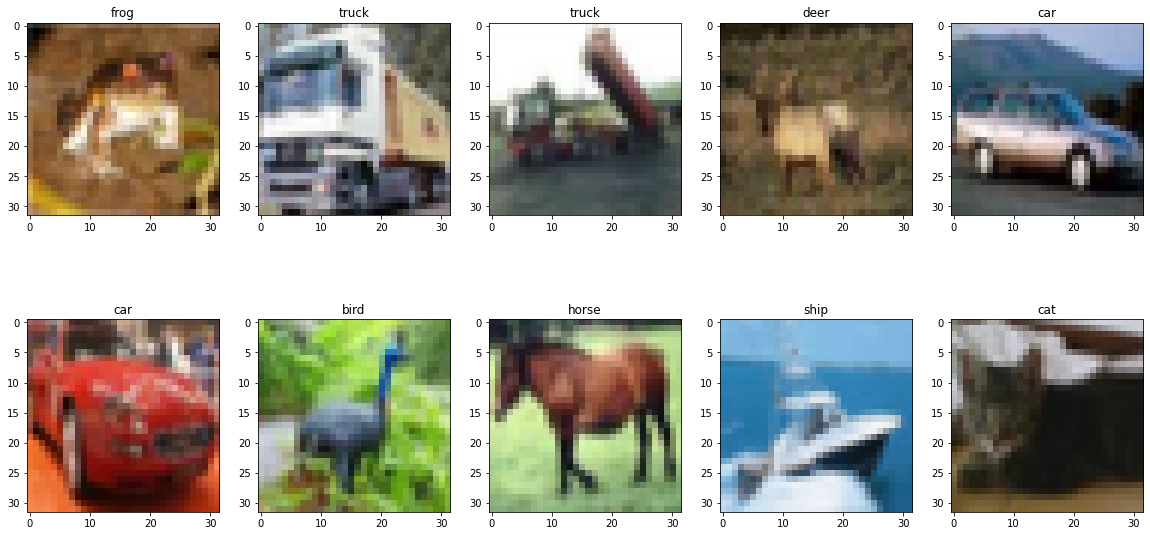

In [ ]:
# display images from dataset
images = range(0,10)
plt.figure(figsize=(20,10))
for i in images:
        plt.subplot(2,5,1 + i).set_title(labels[y_train[i][0]])
        plt.imshow(x_train[i].reshape(32,32,3))
      
plt.show()

# **Additional Function**

In [18]:
labels=['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [19]:
# Make sure TensorFlow running on GPU

# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
K.tensorflow_backend._get_available_gpus()
#tf.config.list_physical_devices('GPU') 

['/job:localhost/replica:0/task:0/device:GPU:0']

In [20]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7



In [21]:
def plothist(hist):
    plt.plot(hist.history['accuracy'],color='b',linewidth=2.0)
    plt.plot(hist.history['val_accuracy'],color='r',linewidth=2.0)

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid()
    plt.show()

def plothist_loss(hist):
    plt.plot(hist.history['loss'],color='b',linewidth=2.0)
    plt.plot(hist.history['val_loss'],color='r',linewidth=2.0)
  
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid()
    plt.show()
def Hot_to_num(x):
  y=[]
  for i in range(0,x.shape[0]):
    y.append(np.where(x[i]==1)[0][0])
  return np.array(y)

# **MLP Classifier**

## **1.MLP// Batch Size=32**


**Parameters and Hyper-Parameters**
* 	Batch Size: 32
* 	Epochs: 100
*   Number of Neurons in input layer: 512
* 	Number of Neurons in hidden layers:256
* 	Number of Neurons in output layer:10
* 	Hidden Layer Activation Function: Relu
* 	Output Layer Activation Function: Softmax
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: SGD
* 	Dropout: 0.2












### **Architecture**

In [ ]:
MLP_num_epoch = 100
MLP_batch_size = 32
MLP_num_classes = 10
(x_train, y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32 * 32 * 3)
MLP_x_test  = MLP_x_test.reshape (10000, 32 * 32 * 3)

MLP_x_train, MLP_x_valid, MLP_y_train, MLP_y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



MLP_x_train = MLP_x_train.astype('float32')
MLP_x_valid = MLP_x_valid.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')

# Normalise data
MLP_x_train /= 255.0
MLP_x_valid /= 255.0
MLP_x_test /= 255.0

# one-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes)
MLP_y_valid_1hot = np_utils.to_categorical(MLP_y_valid, MLP_num_classes) 
MLP_y_test_1hot  = np_utils.to_categorical(MLP_y_test , MLP_num_classes)

# MLP
MLP_model = Sequential()
# Input layer
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# First Hidden Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Second Hidde Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Output Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(10)) # use 10 neurons as the output 
MLP_model.add(Activation('softmax'))

MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

MLP_model.compile(loss='categorical_crossentropy', 
                  optimizer=MLP_opt_sgd,
                  metrics=['accuracy']) 
MLP_model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_42 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_43 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)             

### **Train the Model**

In [ ]:
# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
#                     validation_split = 0.2)
                    validation_data=(MLP_x_valid, MLP_y_valid_1hot))

# MLP_model.save('MLP_model_sample.h5') #saved 31/10 9pm

# Evaluation on the training
print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)


Training.....
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 8s 191us/step - loss: 2.0094 - accuracy: 0.2600 - val_loss: 1.8253 - val_accuracy: 0.3456
Epoch 2/100
40000/40000 [==============================] - 7s 182us/step - loss: 1.8283 - accuracy: 0.3434 - val_loss: 1.7460 - val_accuracy: 0.3873
Epoch 3/100
40000/40000 [==============================] - 7s 180us/step - loss: 1.7485 - accuracy: 0.3754 - val_loss: 1.6719 - val_accuracy: 0.4026
Epoch 4/100
40000/40000 [==============================] - 7s 179us/step - loss: 1.6970 - accuracy: 0.3950 - val_loss: 1.6117 - val_accuracy: 0.4242
Epoch 5/100
40000/40000 [==============================] - 7s 179us/step - loss: 1.6589 - accuracy: 0.4094 - val_loss: 1.5964 - val_accuracy: 0.4309
Epoch 6/100
40000/40000 [==============================] - 7s 185us/step - loss: 1.6227 - accuracy: 0.4212 - val_loss: 1.6004 - val_accuracy: 0.4288
Epoch 7/100
40000/40000 [=================

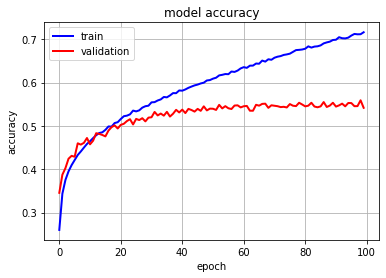

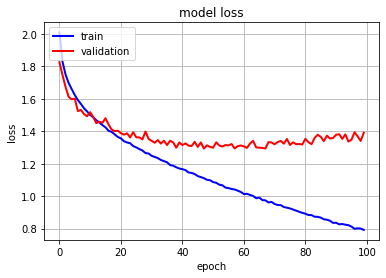

In [ ]:
plothist(history)
plothist_loss(history)

### **Prediction**

In [ ]:
predictions=(MLP_model.predict(MLP_x_test)).tolist()

MLP_y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])

MLP_y_predicted=Hot_to_num(MLP_y_pred_1hot)

### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

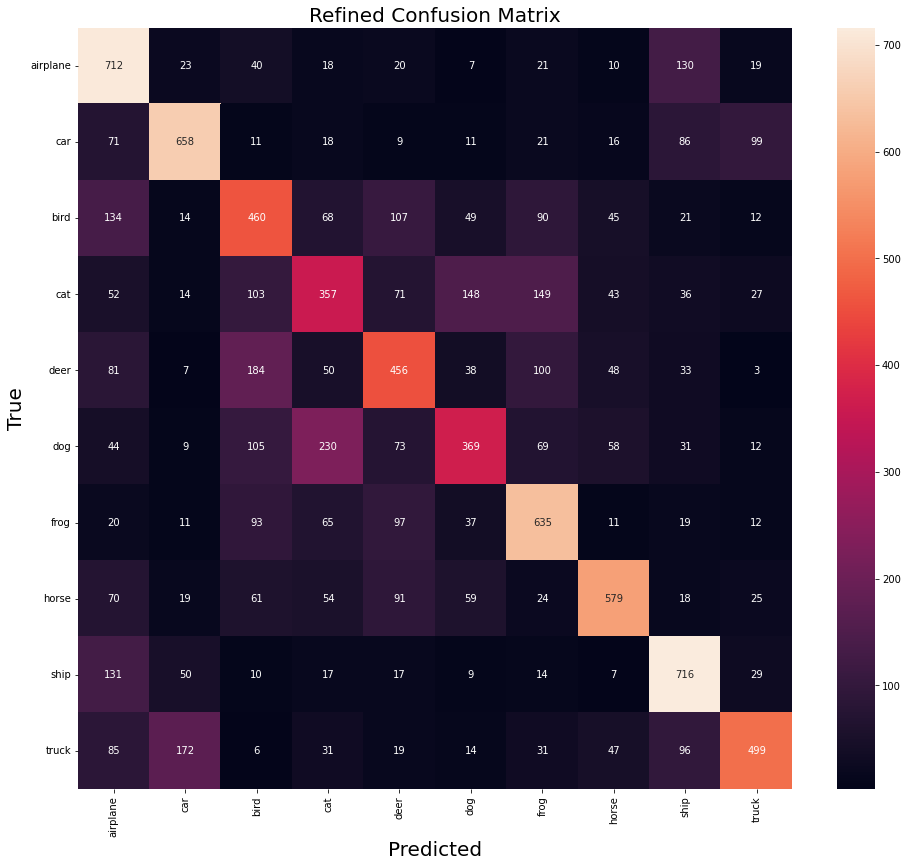

In [ ]:
cm=confusion_matrix(MLP_y_test, MLP_y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(MLP_y_test, MLP_y_predicted))

              precision    recall  f1-score   support

           0       0.51      0.71      0.59      1000
           1       0.67      0.66      0.67      1000
           2       0.43      0.46      0.44      1000
           3       0.39      0.36      0.37      1000
           4       0.47      0.46      0.47      1000
           5       0.50      0.37      0.42      1000
           6       0.55      0.64      0.59      1000
           7       0.67      0.58      0.62      1000
           8       0.60      0.72      0.66      1000
           9       0.68      0.50      0.57      1000

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.54     10000
weighted avg       0.55      0.54      0.54     10000



## **2.MLP// Batch Size=64**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Number of Neurons in input layer: 512
* 	Number of Neurons in hidden layers:256
* 	Number of Neurons in output layer:10
* 	Hidden Layer Activation Function: Relu
* 	Output Layer Activation Function: Softmax
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: SGD
* 	Dropout: 0.2












### **Architecture**

In [34]:
MLP_num_epoch = 100
MLP_batch_size = 64
MLP_num_classes = 10
(x_train, y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32 * 32 * 3)
MLP_x_test  = MLP_x_test.reshape (10000, 32 * 32 * 3)

MLP_x_train, MLP_x_valid, MLP_y_train, MLP_y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



MLP_x_train = MLP_x_train.astype('float32')
MLP_x_valid = MLP_x_valid.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')

# Normalise data
MLP_x_train /= 255.0
MLP_x_valid /= 255.0
MLP_x_test /= 255.0

# one-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes)
MLP_y_valid_1hot = np_utils.to_categorical(MLP_y_valid, MLP_num_classes) 
MLP_y_test_1hot  = np_utils.to_categorical(MLP_y_test , MLP_num_classes)

# MLP
MLP_model = Sequential()
# Input layer
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# First Hidden Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Second Hidde Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Output Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(10)) # use 10 neurons as the output 
MLP_model.add(Activation('softmax'))

MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

MLP_model.compile(loss='categorical_crossentropy', 
                  optimizer=MLP_opt_sgd,
                  metrics=['accuracy']) 
MLP_model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)              

### **Train the Model**

In [35]:
# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
#                     validation_split = 0.2)
                    validation_data=(MLP_x_valid, MLP_y_valid_1hot))

# MLP_model.save('MLP_model_sample.h5') #saved 31/10 9pm

# Evaluation on the training
print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Training.....
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 104us/step - loss: 2.0703 - accuracy: 0.2375 - val_loss: 1.8862 - val_accuracy: 0.3288
Epoch 2/100
40000/40000 [==============================] - 4s 96us/step - loss: 1.8901 - accuracy: 0.3171 - val_loss: 1.7770 - val_accuracy: 0.3708
Epoch 3/100
40000/40000 [==============================] - 4s 98us/step - loss: 1.8148 - accuracy: 0.3472 - val_loss: 1.7271 - val_accuracy: 0.3850
Epoch 4/100
40000/40000 [==============================] - 4s 97us/step - loss: 1.7596 - accuracy: 0.3703 - val_loss: 1.7031 - val_accuracy: 0.3920
Epoch 5/100
40000/40000 [==============================] - 4s 97us/step - loss: 1.7145 - accuracy: 0.3860 - val_loss: 1.6490 - val_accuracy: 0.4174
Epoch 6/100
40000/40000 [==============================] - 4s 97us/step - loss: 1.6796 - accuracy: 0.4006 - val_loss: 1.6163 - val_accuracy: 0.4190
Epoch 7/100
40000/40000 [======================

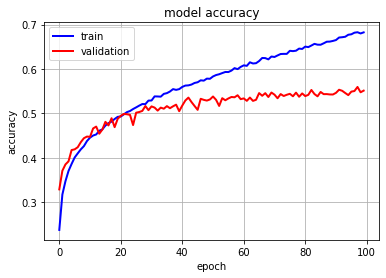

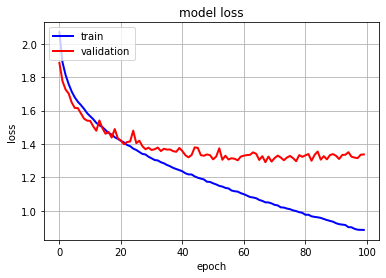

In [36]:
plothist(history)
plothist_loss(history)

### **Prediction**

In [37]:
predictions=(MLP_model.predict(MLP_x_test)).tolist()

MLP_y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])

MLP_y_predicted=Hot_to_num(MLP_y_pred_1hot)

### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

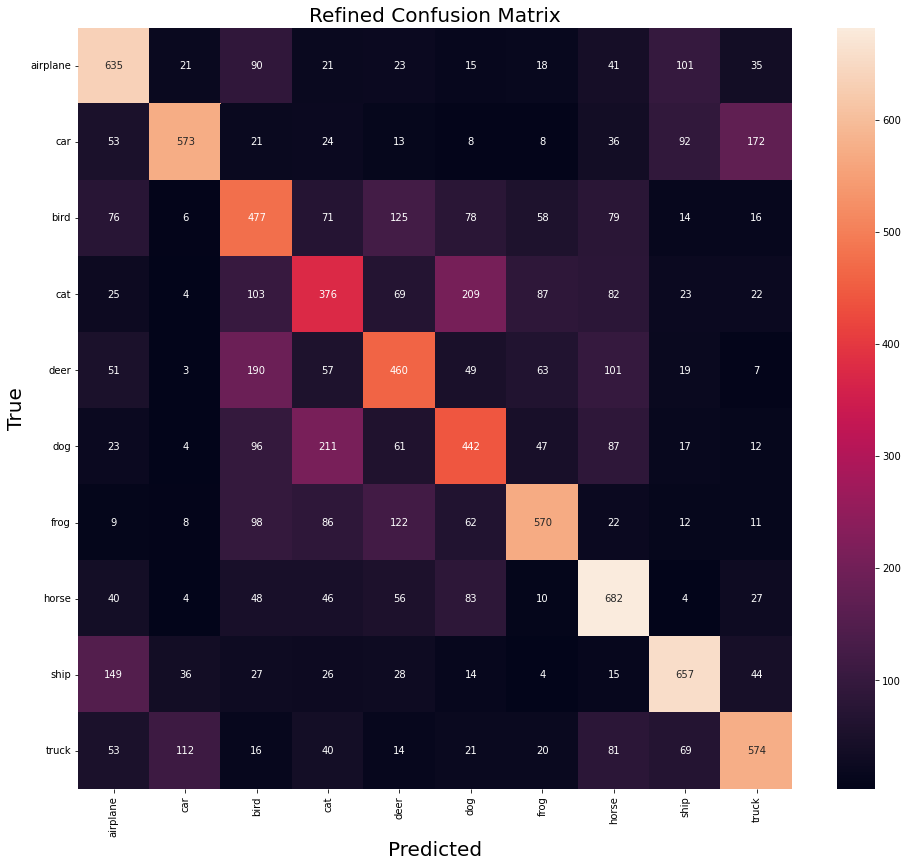

In [38]:
cm=confusion_matrix(MLP_y_test, MLP_y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [39]:
print(classification_report(MLP_y_test, MLP_y_predicted))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60      1000
           1       0.74      0.57      0.65      1000
           2       0.41      0.48      0.44      1000
           3       0.39      0.38      0.38      1000
           4       0.47      0.46      0.47      1000
           5       0.45      0.44      0.45      1000
           6       0.64      0.57      0.60      1000
           7       0.56      0.68      0.61      1000
           8       0.65      0.66      0.65      1000
           9       0.62      0.57      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.55     10000
weighted avg       0.55      0.54      0.55     10000



## **3.MLP// Batch Size=256**


**Parameters and Hyper-Parameters**
* 	Batch Size: 256
* 	Epochs: 100
*   Number of Neurons in input layer: 512
* 	Number of Neurons in hidden layers:256
* 	Number of Neurons in output layer:10
* 	Hidden Layer Activation Function: Relu
* 	Output Layer Activation Function: Softmax
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: SGD
* 	Dropout: 0.2












### **Architecture**

In [ ]:
MLP_num_epoch = 100
MLP_batch_size = 256
MLP_num_classes = 10
(x_train, y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32 * 32 * 3)
MLP_x_test  = MLP_x_test.reshape (10000, 32 * 32 * 3)

MLP_x_train, MLP_x_valid, MLP_y_train, MLP_y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



MLP_x_train = MLP_x_train.astype('float32')
MLP_x_valid = MLP_x_valid.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')

# Normalise data
MLP_x_train /= 255.0
MLP_x_valid /= 255.0
MLP_x_test /= 255.0

# one-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes)
MLP_y_valid_1hot = np_utils.to_categorical(MLP_y_valid, MLP_num_classes) 
MLP_y_test_1hot  = np_utils.to_categorical(MLP_y_test , MLP_num_classes)

# MLP
MLP_model = Sequential()
# Input layer
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# First Hidden Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Second Hidde Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Output Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(10)) # use 10 neurons as the output 
MLP_model.add(Activation('softmax'))

MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

MLP_model.compile(loss='categorical_crossentropy', 
                  optimizer=MLP_opt_sgd,
                  metrics=['accuracy']) 
MLP_model.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_50 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_51 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 256)             

### **Train the Model**

In [ ]:
# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
#                     validation_split = 0.2)
                    validation_data=(MLP_x_valid, MLP_y_valid_1hot))

# MLP_model.save('MLP_model_sample.h5') #saved 31/10 9pm

# Evaluation on the training
print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Training.....
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 2s 43us/step - loss: 2.2175 - accuracy: 0.1768 - val_loss: 2.0596 - val_accuracy: 0.2738
Epoch 2/100
40000/40000 [==============================] - 1s 37us/step - loss: 2.0520 - accuracy: 0.2490 - val_loss: 1.9439 - val_accuracy: 0.3180
Epoch 3/100
40000/40000 [==============================] - 1s 36us/step - loss: 1.9706 - accuracy: 0.2858 - val_loss: 1.8843 - val_accuracy: 0.3402
Epoch 4/100
40000/40000 [==============================] - 1s 36us/step - loss: 1.9233 - accuracy: 0.3067 - val_loss: 1.8416 - val_accuracy: 0.3507
Epoch 5/100
40000/40000 [==============================] - 1s 36us/step - loss: 1.8829 - accuracy: 0.3218 - val_loss: 1.8252 - val_accuracy: 0.3527
Epoch 6/100
40000/40000 [==============================] - 1s 36us/step - loss: 1.8539 - accuracy: 0.3359 - val_loss: 1.7812 - val_accuracy: 0.3675
Epoch 7/100
40000/40000 [=======================

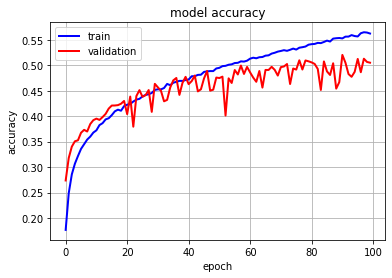

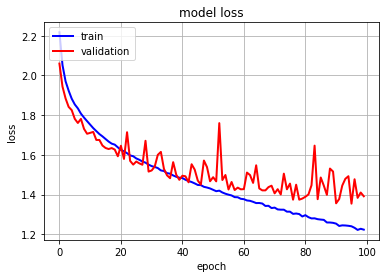

In [ ]:
plothist(history)
plothist_loss(history)

### **Prediction**

In [ ]:
predictions=(MLP_model.predict(MLP_x_test)).tolist()

MLP_y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])

MLP_y_predicted=Hot_to_num(MLP_y_pred_1hot)

### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

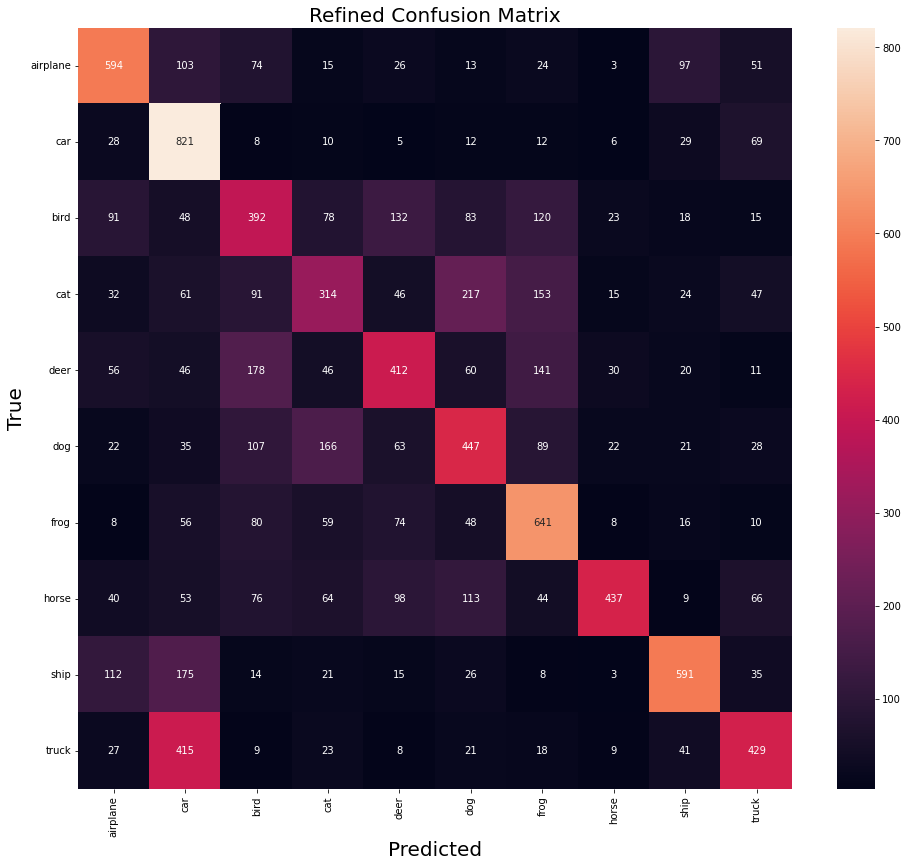

In [ ]:
cm=confusion_matrix(MLP_y_test, MLP_y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(MLP_y_test, MLP_y_predicted))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      1000
           1       0.45      0.82      0.58      1000
           2       0.38      0.39      0.39      1000
           3       0.39      0.31      0.35      1000
           4       0.47      0.41      0.44      1000
           5       0.43      0.45      0.44      1000
           6       0.51      0.64      0.57      1000
           7       0.79      0.44      0.56      1000
           8       0.68      0.59      0.63      1000
           9       0.56      0.43      0.49      1000

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.50     10000
weighted avg       0.53      0.51      0.50     10000



## **4.MLP// Batch Size=64,Activation Function=tanh**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Number of Neurons in input layer: 512
* 	Number of Neurons in hidden layers:256
* 	Number of Neurons in output layer:10
* 	Hidden Layer Activation Function: tanh
* 	Output Layer Activation Function: Softmax
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: SGD
* 	Dropout: 0.2












### **Architecture**

In [ ]:
MLP_num_epoch = 100
MLP_batch_size = 64
MLP_num_classes = 10
(x_train, y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32 * 32 * 3)
MLP_x_test  = MLP_x_test.reshape (10000, 32 * 32 * 3)

MLP_x_train, MLP_x_valid, MLP_y_train, MLP_y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



MLP_x_train = MLP_x_train.astype('float32')
MLP_x_valid = MLP_x_valid.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')

# Normalise data
MLP_x_train /= 255.0
MLP_x_valid /= 255.0
MLP_x_test /= 255.0

# one-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes)
MLP_y_valid_1hot = np_utils.to_categorical(MLP_y_valid, MLP_num_classes) 
MLP_y_test_1hot  = np_utils.to_categorical(MLP_y_test , MLP_num_classes)

# MLP
MLP_model = Sequential()
# Input layer
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('tanh'))
#MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))


# First Hidden Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('tanh'))

# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('relu'))

# Second Hidde Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('tanh'))
#MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# 

# Output Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(10)) # use 10 neurons as the output 
MLP_model.add(Activation('softmax'))

MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

MLP_model.compile(loss='categorical_crossentropy', 
                  optimizer=MLP_opt_sgd,
                  metrics=['accuracy']) 
MLP_model.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_58 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_59 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 256)             

### **Train the Model**

In [ ]:
# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
#                     validation_split = 0.2)
                    validation_data=(MLP_x_valid, MLP_y_valid_1hot))

# MLP_model.save('MLP_model_sample.h5') #saved 31/10 9pm

# Evaluation on the training
print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Training.....
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 112us/step - loss: 2.0200 - accuracy: 0.2716 - val_loss: 1.8440 - val_accuracy: 0.3534
Epoch 2/100
40000/40000 [==============================] - 4s 99us/step - loss: 1.8735 - accuracy: 0.3296 - val_loss: 1.7684 - val_accuracy: 0.3795
Epoch 3/100
40000/40000 [==============================] - 4s 99us/step - loss: 1.8250 - accuracy: 0.3503 - val_loss: 1.7486 - val_accuracy: 0.3820
Epoch 4/100
40000/40000 [==============================] - 4s 99us/step - loss: 1.7973 - accuracy: 0.3618 - val_loss: 1.7397 - val_accuracy: 0.3926
Epoch 5/100
40000/40000 [==============================] - 4s 100us/step - loss: 1.7682 - accuracy: 0.3726 - val_loss: 1.7215 - val_accuracy: 0.3968
Epoch 6/100
40000/40000 [==============================] - 4s 100us/step - loss: 1.7464 - accuracy: 0.3805 - val_loss: 1.6934 - val_accuracy: 0.3969
Epoch 7/100
40000/40000 [====================

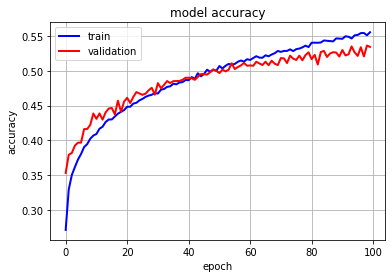

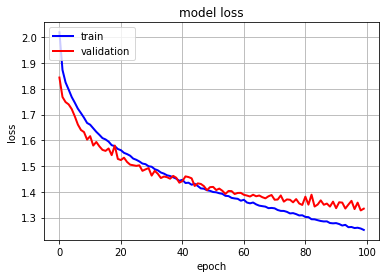

In [ ]:
plothist(history)
plothist_loss(history)

### **Prediction**

In [ ]:
predictions=(MLP_model.predict(MLP_x_test)).tolist()

MLP_y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])

MLP_y_predicted=Hot_to_num(MLP_y_pred_1hot)

### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

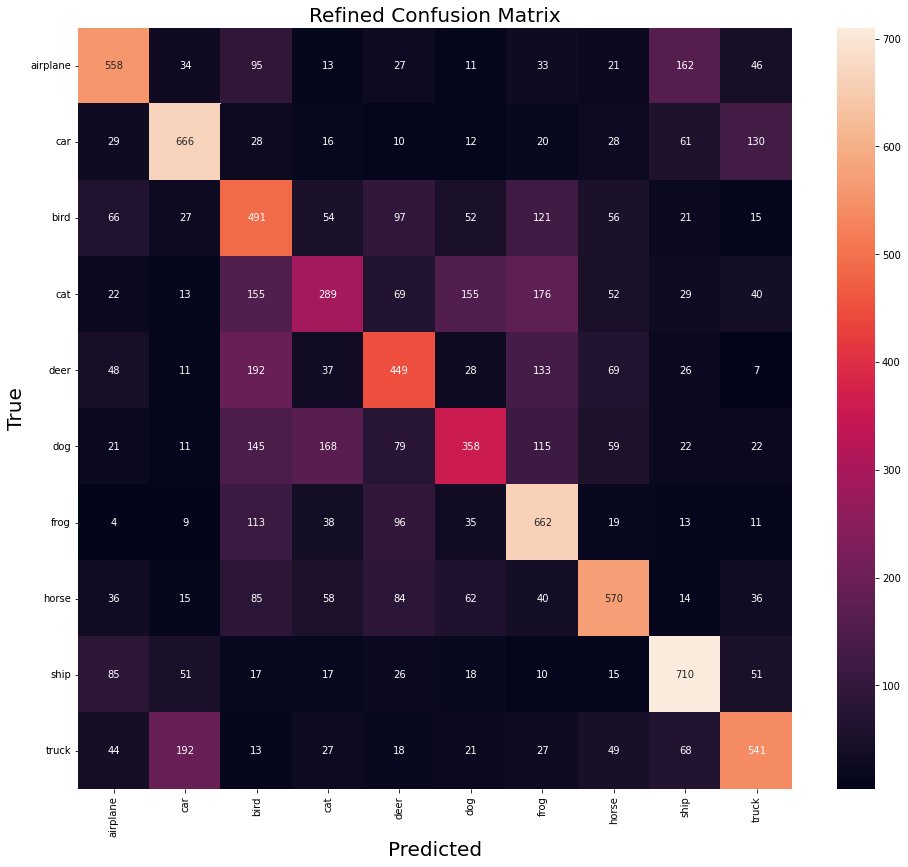

In [ ]:
cm=confusion_matrix(MLP_y_test, MLP_y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(MLP_y_test, MLP_y_predicted))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58      1000
           1       0.65      0.67      0.66      1000
           2       0.37      0.49      0.42      1000
           3       0.40      0.29      0.34      1000
           4       0.47      0.45      0.46      1000
           5       0.48      0.36      0.41      1000
           6       0.50      0.66      0.57      1000
           7       0.61      0.57      0.59      1000
           8       0.63      0.71      0.67      1000
           9       0.60      0.54      0.57      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.53     10000
weighted avg       0.53      0.53      0.53     10000



## **5.MLP// Cost Function:MSE**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Number of Neurons in input layer: 512
* 	Number of Neurons in hidden layers:256
* 	Number of Neurons in output layer:10
* 	Hidden Layer Activation Function: ReLU
* 	Output Layer Activation Function: Softmax
* 	Loss Function: 
* 	Optimizer: SGD
* 	Dropout: 0.2












### **Architecture**

In [ ]:
MLP_num_epoch = 100
MLP_batch_size = 64
MLP_num_classes = 10
(x_train, y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32 * 32 * 3)
MLP_x_test  = MLP_x_test.reshape (10000, 32 * 32 * 3)

MLP_x_train, MLP_x_valid, MLP_y_train, MLP_y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



MLP_x_train = MLP_x_train.astype('float32')
MLP_x_valid = MLP_x_valid.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')

# Normalise data
MLP_x_train /= 255.0
MLP_x_valid /= 255.0
MLP_x_test /= 255.0

# one-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes)
MLP_y_valid_1hot = np_utils.to_categorical(MLP_y_valid, MLP_num_classes) 
MLP_y_test_1hot  = np_utils.to_categorical(MLP_y_test , MLP_num_classes)

# MLP
MLP_model = Sequential()
# Input layer
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
#MLP_model.add(Activation('tanh'))


# First Hidden Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))


# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Second Hidde Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Output Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(10)) # use 10 neurons as the output 
MLP_model.add(Activation('softmax'))

MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

MLP_model.compile(loss='mean_squared_error', 
                  optimizer=MLP_opt_sgd,
                  metrics=['accuracy']) 
MLP_model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)              

### **Train the Model**

In [ ]:
# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
#                     validation_split = 0.2)
                    validation_data=(MLP_x_valid, MLP_y_valid_1hot))

# MLP_model.save('MLP_model_sample.h5') #saved 31/10 9pm

# Evaluation on the training
print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Training.....
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 101us/step - loss: 0.0912 - accuracy: 0.1085 - val_loss: 0.0896 - val_accuracy: 0.1278
Epoch 2/100
40000/40000 [==============================] - 4s 96us/step - loss: 0.0900 - accuracy: 0.1271 - val_loss: 0.0889 - val_accuracy: 0.1482
Epoch 3/100
40000/40000 [==============================] - 4s 95us/step - loss: 0.0895 - accuracy: 0.1461 - val_loss: 0.0884 - val_accuracy: 0.1752
Epoch 4/100
40000/40000 [==============================] - 4s 96us/step - loss: 0.0890 - accuracy: 0.1620 - val_loss: 0.0878 - val_accuracy: 0.2025
Epoch 5/100
40000/40000 [==============================] - 4s 96us/step - loss: 0.0884 - accuracy: 0.1771 - val_loss: 0.0872 - val_accuracy: 0.2132
Epoch 6/100
40000/40000 [==============================] - 4s 95us/step - loss: 0.0879 - accuracy: 0.1876 - val_loss: 0.0866 - val_accuracy: 0.2326
Epoch 7/100
40000/40000 [======================

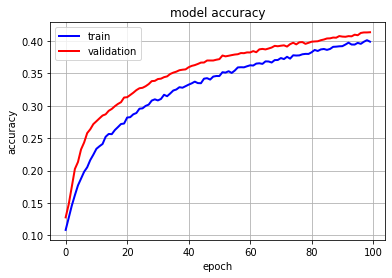

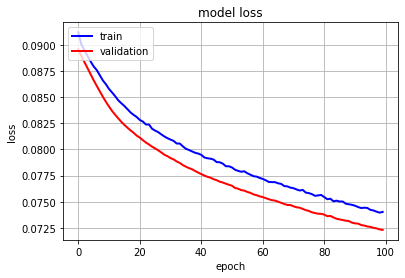

In [ ]:
plothist(history)
plothist_loss(history)

### **Prediction**

In [ ]:
predictions=(MLP_model.predict(MLP_x_test)).tolist()

MLP_y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])

MLP_y_predicted=Hot_to_num(MLP_y_pred_1hot)

### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

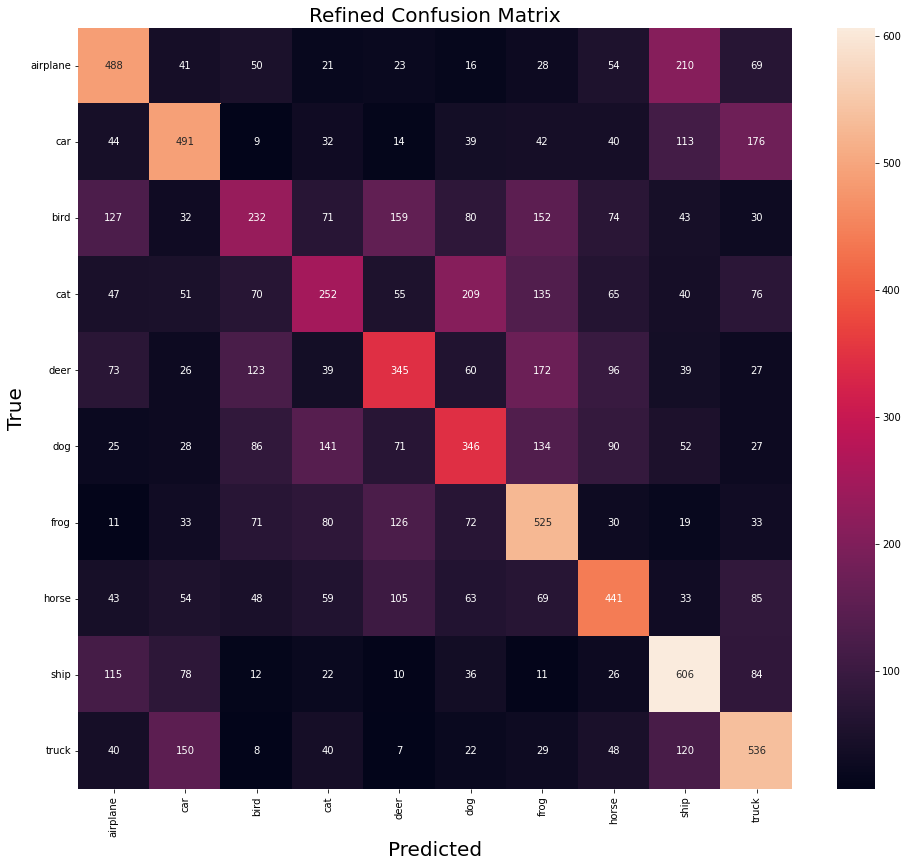

In [ ]:
cm=confusion_matrix(MLP_y_test, MLP_y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(MLP_y_test, MLP_y_predicted))

              precision    recall  f1-score   support

           0       0.48      0.49      0.48      1000
           1       0.50      0.49      0.49      1000
           2       0.33      0.23      0.27      1000
           3       0.33      0.25      0.29      1000
           4       0.38      0.34      0.36      1000
           5       0.37      0.35      0.36      1000
           6       0.40      0.53      0.46      1000
           7       0.46      0.44      0.45      1000
           8       0.48      0.61      0.53      1000
           9       0.47      0.54      0.50      1000

    accuracy                           0.43     10000
   macro avg       0.42      0.43      0.42     10000
weighted avg       0.42      0.43      0.42     10000



## **6.MLP// Optimizer=SGD+Momentum**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Number of Neurons in input layer: 512
* 	Number of Neurons in hidden layers:256
* 	Number of Neurons in output layer:10
* 	Hidden Layer Activation Function: Relu
* 	Output Layer Activation Function: Softmax
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: SGD + Momentum
* 	Dropout: 0.2












### **Architecture**

In [40]:
MLP_num_epoch = 100
MLP_batch_size = 64
MLP_num_classes = 10
(x_train, y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32 * 32 * 3)
MLP_x_test  = MLP_x_test.reshape (10000, 32 * 32 * 3)

MLP_x_train, MLP_x_valid, MLP_y_train, MLP_y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



MLP_x_train = MLP_x_train.astype('float32')
MLP_x_valid = MLP_x_valid.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')

# Normalise data
MLP_x_train /= 255.0
MLP_x_valid /= 255.0
MLP_x_test /= 255.0

# one-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes)
MLP_y_valid_1hot = np_utils.to_categorical(MLP_y_valid, MLP_num_classes) 
MLP_y_test_1hot  = np_utils.to_categorical(MLP_y_test , MLP_num_classes)

# MLP
MLP_model = Sequential()
# Input layer
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# First Hidden Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Second Hidde Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Output Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(10)) # use 10 neurons as the output 
MLP_model.add(Activation('softmax'))

MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

MLP_model.compile(loss='categorical_crossentropy', 
                  optimizer=MLP_opt_sgd_mom,
                  metrics=['accuracy']) 
MLP_model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_17 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_18 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)              

### **Train the Model**

In [41]:
# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
#                     validation_split = 0.2)
                    validation_data=(MLP_x_valid, MLP_y_valid_1hot))

# MLP_model.save('MLP_model_sample.h5') #saved 31/10 9pm

# Evaluation on the training
print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Training.....
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 104us/step - loss: 1.9744 - accuracy: 0.2761 - val_loss: 1.8056 - val_accuracy: 0.3474
Epoch 2/100
40000/40000 [==============================] - 4s 98us/step - loss: 1.8369 - accuracy: 0.3373 - val_loss: 1.7408 - val_accuracy: 0.3789
Epoch 3/100
40000/40000 [==============================] - 4s 97us/step - loss: 1.7726 - accuracy: 0.3616 - val_loss: 1.6771 - val_accuracy: 0.3959
Epoch 4/100
40000/40000 [==============================] - 4s 98us/step - loss: 1.7275 - accuracy: 0.3773 - val_loss: 1.6405 - val_accuracy: 0.4161
Epoch 5/100
40000/40000 [==============================] - 4s 99us/step - loss: 1.6922 - accuracy: 0.3925 - val_loss: 1.6333 - val_accuracy: 0.4076
Epoch 6/100
40000/40000 [==============================] - 4s 98us/step - loss: 1.6616 - accuracy: 0.4003 - val_loss: 1.6299 - val_accuracy: 0.4119
Epoch 7/100
40000/40000 [======================

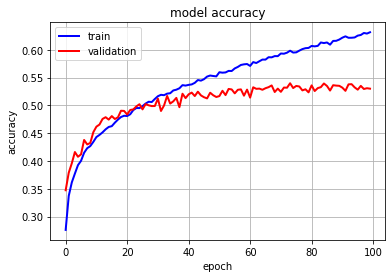

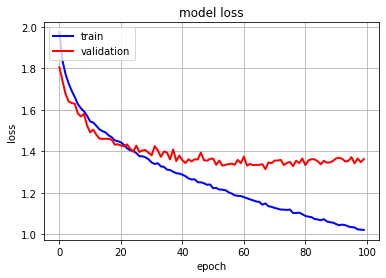

In [42]:
plothist(history)
plothist_loss(history)

### **Prediction**

In [43]:
predictions=(MLP_model.predict(MLP_x_test)).tolist()

MLP_y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])

MLP_y_predicted=Hot_to_num(MLP_y_pred_1hot)

### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

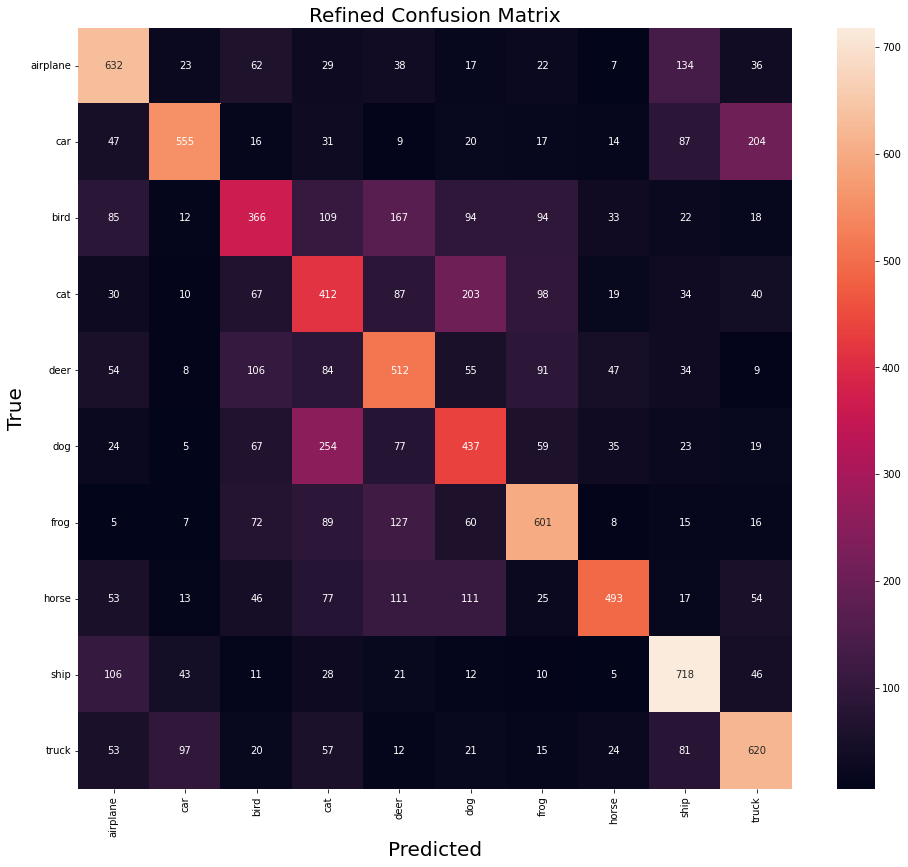

In [44]:
cm=confusion_matrix(MLP_y_test, MLP_y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [45]:
print(classification_report(MLP_y_test, MLP_y_predicted))

              precision    recall  f1-score   support

           0       0.58      0.63      0.61      1000
           1       0.72      0.56      0.63      1000
           2       0.44      0.37      0.40      1000
           3       0.35      0.41      0.38      1000
           4       0.44      0.51      0.47      1000
           5       0.42      0.44      0.43      1000
           6       0.58      0.60      0.59      1000
           7       0.72      0.49      0.59      1000
           8       0.62      0.72      0.66      1000
           9       0.58      0.62      0.60      1000

    accuracy                           0.53     10000
   macro avg       0.55      0.53      0.54     10000
weighted avg       0.55      0.53      0.54     10000



## **7.MLP//Optimizer=ADAM**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Number of Neurons in input layer: 512
* 	Number of Neurons in hidden layers:256
* 	Number of Neurons in output layer:10
* 	Hidden Layer Activation Function: Relu
* 	Output Layer Activation Function: Softmax
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: ADAM
* 	Dropout: 0.2












### **Architecture**

In [ ]:
MLP_num_epoch = 100
MLP_batch_size = 64
MLP_num_classes = 10
(x_train, y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32 * 32 * 3)
MLP_x_test  = MLP_x_test.reshape (10000, 32 * 32 * 3)

MLP_x_train, MLP_x_valid, MLP_y_train, MLP_y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



MLP_x_train = MLP_x_train.astype('float32')
MLP_x_valid = MLP_x_valid.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')
x_train = x_train.astype('float32')
# Normalise data
MLP_x_train /= 255.0
MLP_x_valid /= 255.0
MLP_x_test  /= 255.0
x_train     /=255.0

# one-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes)
MLP_y_valid_1hot = np_utils.to_categorical(MLP_y_valid, MLP_num_classes) 
MLP_y_test_1hot  = np_utils.to_categorical(MLP_y_test , MLP_num_classes)
y_train_1hot     = np_utils.to_categorical(   y_train , MLP_num_classes)

# MLP
MLP_model = Sequential()
# Input layer
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# First Hidden Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Second Hidde Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Output Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(10)) # use 10 neurons as the output 
MLP_model.add(Activation('softmax'))

MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

MLP_model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy']) 
MLP_model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)              

### **Train the Model**

In [ ]:
# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
                    #validation_split = 0.1)
                    validation_data=(MLP_x_valid, MLP_y_valid_1hot))
                    

# MLP_model.save('MLP_model_sample.h5') #saved 31/10 9pm

# Evaluation on the training
print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Training.....
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 6s 146us/step - loss: 2.0324 - accuracy: 0.2470 - val_loss: 1.8891 - val_accuracy: 0.3273
Epoch 2/100
40000/40000 [==============================] - 6s 138us/step - loss: 1.8789 - accuracy: 0.3149 - val_loss: 1.8378 - val_accuracy: 0.3309
Epoch 3/100
40000/40000 [==============================] - 6s 139us/step - loss: 1.8183 - accuracy: 0.3361 - val_loss: 1.7249 - val_accuracy: 0.3781
Epoch 4/100
40000/40000 [==============================] - 6s 138us/step - loss: 1.7847 - accuracy: 0.3533 - val_loss: 1.7196 - val_accuracy: 0.3825
Epoch 5/100
40000/40000 [==============================] - 6s 138us/step - loss: 1.7587 - accuracy: 0.3630 - val_loss: 1.6977 - val_accuracy: 0.3949
Epoch 6/100
40000/40000 [==============================] - 5s 136us/step - loss: 1.7280 - accuracy: 0.3723 - val_loss: 1.6441 - val_accuracy: 0.4086
Epoch 7/100
40000/40000 [=================

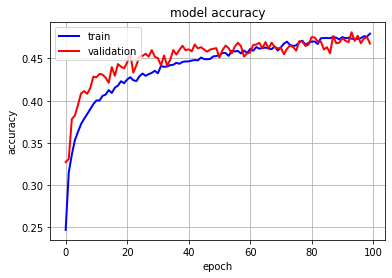

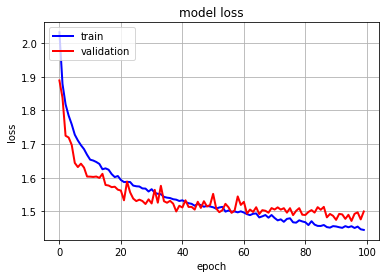

In [ ]:
plothist(history)
plothist_loss(history)

### **Prediction**

In [ ]:
predictions=(MLP_model.predict(MLP_x_test)).tolist()

MLP_y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])

MLP_y_predicted=Hot_to_num(MLP_y_pred_1hot)

### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

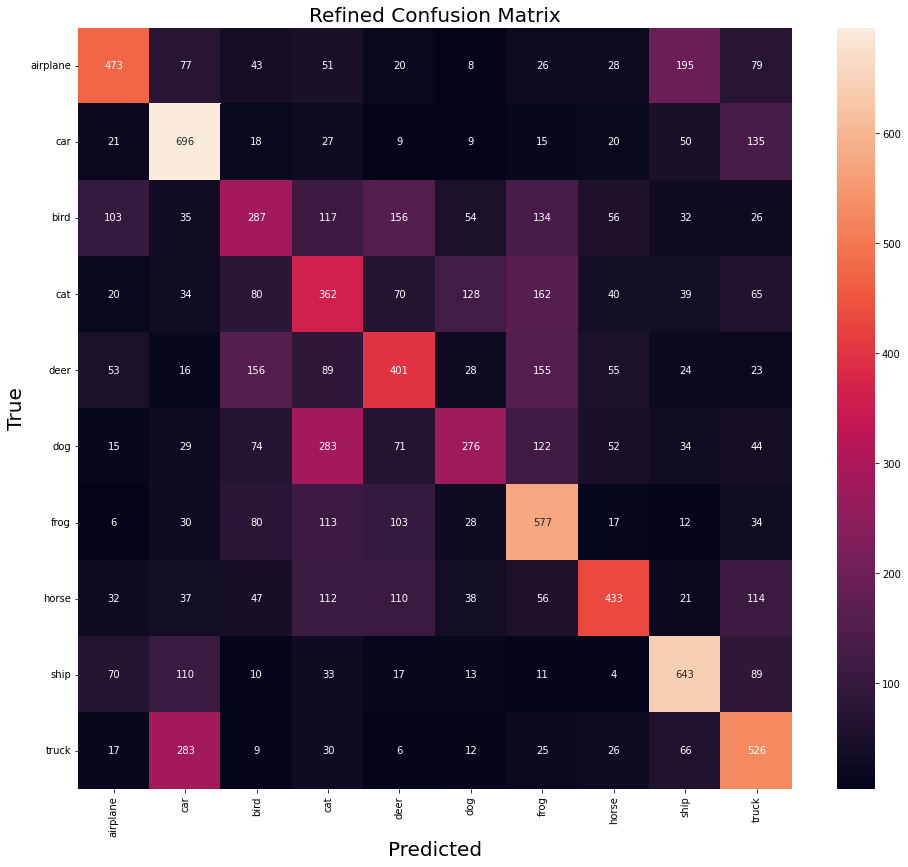

In [ ]:
cm=confusion_matrix(MLP_y_test, MLP_y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(MLP_y_test, MLP_y_predicted))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52      1000
           1       0.52      0.70      0.59      1000
           2       0.36      0.29      0.32      1000
           3       0.30      0.36      0.33      1000
           4       0.42      0.40      0.41      1000
           5       0.46      0.28      0.35      1000
           6       0.45      0.58      0.51      1000
           7       0.59      0.43      0.50      1000
           8       0.58      0.64      0.61      1000
           9       0.46      0.53      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



## **8.MLP// Final Model**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Number of Neurons in input layer: 512
* 	Number of Neurons in hidden layers:256
* 	Number of Neurons in output layer:10
* 	Hidden Layer Activation Function: Relu
* 	Output Layer Activation Function: Softmax
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: SGD
* 	Dropout: 0.2












### **Architecture**

In [ ]:
MLP_num_epoch = 100
MLP_batch_size = 64
MLP_num_classes = 10
(x_train, y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32 * 32 * 3)
MLP_x_test  = MLP_x_test.reshape (10000, 32 * 32 * 3)

MLP_x_train, MLP_x_valid, MLP_y_train, MLP_y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



MLP_x_train = MLP_x_train.astype('float32')
MLP_x_valid = MLP_x_valid.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')

# Normalise data
MLP_x_train /= 255.0
MLP_x_valid /= 255.0
MLP_x_test /= 255.0

# one-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes)
MLP_y_valid_1hot = np_utils.to_categorical(MLP_y_valid, MLP_num_classes) 
MLP_y_test_1hot  = np_utils.to_categorical(MLP_y_test , MLP_num_classes)

# MLP
MLP_model = Sequential()
# Input layer
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# First Hidden Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Second Hidde Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Output Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(10)) # use 10 neurons as the output 
MLP_model.add(Activation('softmax'))

MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

MLP_model.compile(loss='categorical_crossentropy', 
                  optimizer=MLP_opt_sgd,
                  metrics=['accuracy']) 
MLP_model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)              

### **Train the Model**

In [ ]:
# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
#                     validation_split = 0.2)
                    validation_data=(MLP_x_valid, MLP_y_valid_1hot))

# MLP_model.save('MLP_model_sample.h5') #saved 31/10 9pm

# Evaluation on the training
print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Training.....
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 100us/step - loss: 2.0771 - accuracy: 0.2320 - val_loss: 1.8923 - val_accuracy: 0.3359
Epoch 2/100
40000/40000 [==============================] - 4s 97us/step - loss: 1.8942 - accuracy: 0.3200 - val_loss: 1.7921 - val_accuracy: 0.3581
Epoch 3/100
40000/40000 [==============================] - 4s 98us/step - loss: 1.8183 - accuracy: 0.3482 - val_loss: 1.7250 - val_accuracy: 0.3853
Epoch 4/100
40000/40000 [==============================] - 4s 98us/step - loss: 1.7613 - accuracy: 0.3688 - val_loss: 1.6746 - val_accuracy: 0.4023
Epoch 5/100
40000/40000 [==============================] - 4s 99us/step - loss: 1.7179 - accuracy: 0.3853 - val_loss: 1.6375 - val_accuracy: 0.4138
Epoch 6/100
40000/40000 [==============================] - 4s 99us/step - loss: 1.6866 - accuracy: 0.3993 - val_loss: 1.6040 - val_accuracy: 0.4324
Epoch 7/100
40000/40000 [======================

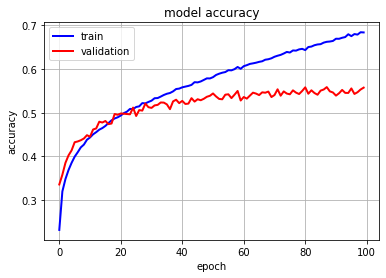

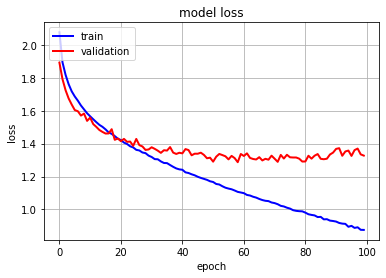

In [ ]:
plothist(history)
plothist_loss(history)

### **Prediction**

In [ ]:
predictions=(MLP_model.predict(MLP_x_test)).tolist()

MLP_y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])

MLP_y_predicted=Hot_to_num(MLP_y_pred_1hot)

### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

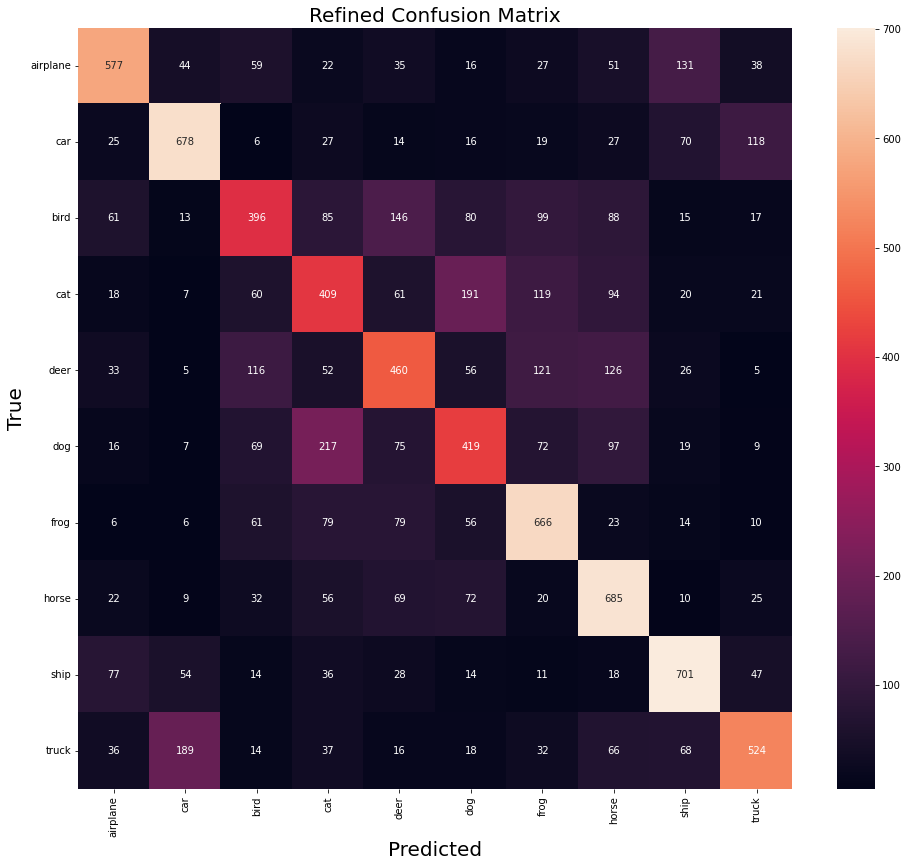

In [ ]:
cm=confusion_matrix(MLP_y_test, MLP_y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(MLP_y_test, MLP_y_predicted))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62      1000
           1       0.67      0.68      0.67      1000
           2       0.48      0.40      0.43      1000
           3       0.40      0.41      0.40      1000
           4       0.47      0.46      0.46      1000
           5       0.45      0.42      0.43      1000
           6       0.56      0.67      0.61      1000
           7       0.54      0.69      0.60      1000
           8       0.65      0.70      0.68      1000
           9       0.64      0.52      0.58      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000



## **9.MLP// Imbalanced Dataset**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Number of Neurons in input layer: 512
* 	Number of Neurons in hidden layers:256
* 	Number of Neurons in output layer:10
* 	Hidden Layer Activation Function: Relu
* 	Output Layer Activation Function: Softmax
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: SGD
* 	Dropout: 0.2












### **Architecture**

In [ ]:
MLP_num_epoch = 100
MLP_batch_size = 64
MLP_num_classes = 10
(x_train, y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

# Removing half of data in airplan and bird classes
labels=['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
removed_sample_air=[]
removed_sample_bird=[]
for sample in range(0,len(y_train)):
  if y_train[sample][0]==0:# airplain
    removed_sample_air.append(sample)
  if y_train[sample][0]==2:# bird
    removed_sample_bird.append(sample)

Index_Removed_List_air =np.random.uniform(0,len(removed_sample_air),int(len(removed_sample_air)*0.5)).astype(int)
Index_Removed_List_bird=np.random.uniform(0,len(removed_sample_bird),int(len(removed_sample_bird)*0.5)).astype(int)

r_air=[]
r_bird =[]
for i in Index_Removed_List_air:
  r_air.append(removed_sample_air[i])
for i in Index_Removed_List_bird:
  r_bird.append(removed_sample_bird[i])

r= r_air+r_bird

x_train_new=np.delete(x_train,(r),axis=0)
y_train_new=np.delete(y_train,(r),axis=0)


#preparing data 

x_train_new = x_train_new.reshape(len(x_train_new), 32 * 32 * 3)
MLP_x_test  = MLP_x_test.reshape (10000, 32 * 32 * 3)

MLP_x_train, MLP_x_valid, MLP_y_train, MLP_y_valid = train_test_split(x_train_new, y_train_new, test_size=0.2, random_state=42)



MLP_x_train = MLP_x_train.astype('float32')
MLP_x_valid = MLP_x_valid.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')

# Normalise data
MLP_x_train /= 255.0
MLP_x_valid /= 255.0
MLP_x_test /= 255.0

# one-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes)
MLP_y_valid_1hot = np_utils.to_categorical(MLP_y_valid, MLP_num_classes) 
MLP_y_test_1hot  = np_utils.to_categorical(MLP_y_test , MLP_num_classes)

# MLP
MLP_model = Sequential()
# Input layer
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# First Hidden Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Second Hidde Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Output Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(10)) # use 10 neurons as the output 
MLP_model.add(Activation('softmax'))

MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

MLP_model.compile(loss='categorical_crossentropy', 
                  optimizer=MLP_opt_sgd,
                  metrics=['accuracy']) 
MLP_model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)              

### **Train the Model**

In [ ]:
# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
#                     validation_split = 0.2)
                    validation_data=(MLP_x_valid, MLP_y_valid_1hot))

# MLP_model.save('MLP_model_sample.h5') #saved 31/10 9pm

# Evaluation on the training
print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Training.....
Train on 36850 samples, validate on 9213 samples
Epoch 1/100
36850/36850 [==============================] - 4s 102us/step - loss: 2.0627 - accuracy: 0.2452 - val_loss: 1.9011 - val_accuracy: 0.3150
Epoch 2/100
36850/36850 [==============================] - 4s 96us/step - loss: 1.8777 - accuracy: 0.3284 - val_loss: 1.7768 - val_accuracy: 0.3723
Epoch 3/100
36850/36850 [==============================] - 4s 95us/step - loss: 1.7919 - accuracy: 0.3639 - val_loss: 1.7223 - val_accuracy: 0.3866
Epoch 4/100
36850/36850 [==============================] - 4s 95us/step - loss: 1.7357 - accuracy: 0.3844 - val_loss: 1.6582 - val_accuracy: 0.4153
Epoch 5/100
36850/36850 [==============================] - 4s 95us/step - loss: 1.6907 - accuracy: 0.3995 - val_loss: 1.6368 - val_accuracy: 0.4303
Epoch 6/100
36850/36850 [==============================] - 4s 96us/step - loss: 1.6568 - accuracy: 0.4150 - val_loss: 1.6254 - val_accuracy: 0.4248
Epoch 7/100
36850/36850 [=======================

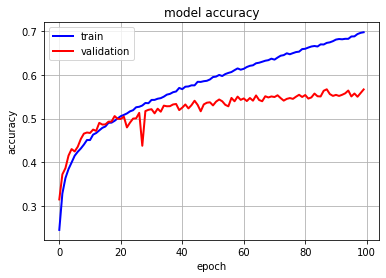

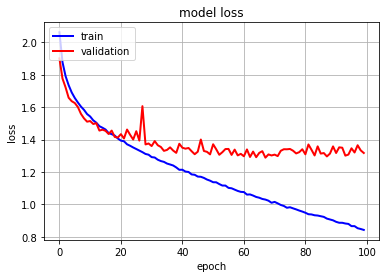

In [ ]:
plothist(history)
plothist_loss(history)

### **Prediction**

In [ ]:
predictions=(MLP_model.predict(MLP_x_test)).tolist()

MLP_y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])

MLP_y_predicted=Hot_to_num(MLP_y_pred_1hot)

### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

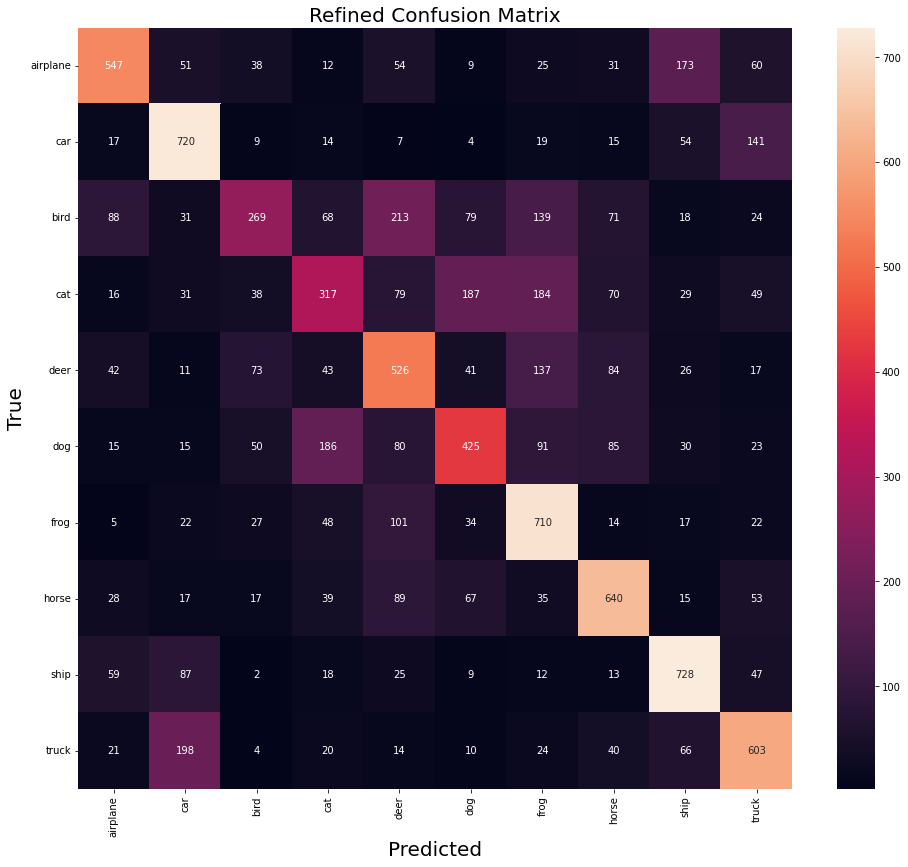

In [ ]:
cm=confusion_matrix(MLP_y_test, MLP_y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(MLP_y_test, MLP_y_predicted))

              precision    recall  f1-score   support

           0       0.65      0.55      0.60      1000
           1       0.61      0.72      0.66      1000
           2       0.51      0.27      0.35      1000
           3       0.41      0.32      0.36      1000
           4       0.44      0.53      0.48      1000
           5       0.49      0.42      0.46      1000
           6       0.52      0.71      0.60      1000
           7       0.60      0.64      0.62      1000
           8       0.63      0.73      0.68      1000
           9       0.58      0.60      0.59      1000

    accuracy                           0.55     10000
   macro avg       0.54      0.55      0.54     10000
weighted avg       0.54      0.55      0.54     10000



## **10.MLP// Imbalanced Dataset, Up Sampling**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Number of Neurons in input layer: 512
* 	Number of Neurons in hidden layers:256
* 	Number of Neurons in output layer:10
* 	Hidden Layer Activation Function: Relu
* 	Output Layer Activation Function: Softmax
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: SGD
* 	Dropout: 0.2












### **Architecture**

In [48]:
MLP_num_epoch = 100
MLP_batch_size = 64
MLP_num_classes = 10
(x_train, y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

# Removing half of data in airplan and bird classes
labels=['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
removed_sample_air=[]
removed_sample_bird=[]
for sample in range(0,len(y_train)):
  if y_train[sample][0]==0:# airplain
    removed_sample_air.append(sample)
  if y_train[sample][0]==2:# bird
    removed_sample_bird.append(sample)

Index_Removed_List_air =np.random.uniform(0,len(removed_sample_air),int(len(removed_sample_air)*0.5)).astype(int)
Index_Removed_List_bird=np.random.uniform(0,len(removed_sample_bird),int(len(removed_sample_bird)*0.5)).astype(int)

r_air=[]
r_bird =[]
for i in Index_Removed_List_air:
  r_air.append(removed_sample_air[i])
for i in Index_Removed_List_bird:
  r_bird.append(removed_sample_bird[i])

r= r_air+r_bird

x_train_new=np.delete(x_train,(r),axis=0)
y_train_new=np.delete(y_train,(r),axis=0)

# Up sampling 
add_sample_air=[]
add_sample_bird=[]
for sample in range(0,len(y_train_new)):
  if y_train_new[sample][0]==0:# airplain
    add_sample_air.append(sample)
  if y_train_new[sample][0]==2:# bird
    add_sample_bird.append(sample)

Index_add_List_air =np.random.uniform(0,len(add_sample_air),int(len(add_sample_air)*2)).astype(int)
Index_add_List_bird=np.random.uniform(0,len(add_sample_bird),int(len(add_sample_bird)*2)).astype(int)

a_air=[]
a_bird =[]
for i in Index_add_List_air:
   a_air.append(x_train_new[add_sample_air[i]])
for i in Index_add_List_bird:
   a_bird.append(x_train_new[add_sample_bird[i]])

a= a_air+a_bird
yair=[[0]]*len(a_air)
ybird=[[2]]*len(a_bird)
y=yair+ybird
x_train_up=np.concatenate((x_train_new,a))
y_train_up=np.concatenate((y_train_new,y))



#preparing data 

x_train_up = x_train_up.reshape(len(x_train_up), 32 * 32 * 3)
MLP_x_test  = MLP_x_test.reshape (10000, 32 * 32 * 3)

MLP_x_train, MLP_x_valid, MLP_y_train, MLP_y_valid = train_test_split(x_train_up, y_train_up, test_size=0.1, random_state=42)



MLP_x_train = MLP_x_train.astype('float32')
MLP_x_valid = MLP_x_valid.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')

# Normalise data
MLP_x_train /= 255.0
MLP_x_valid /= 255.0
MLP_x_test /= 255.0

# one-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes)
MLP_y_valid_1hot = np_utils.to_categorical(MLP_y_valid, MLP_num_classes) 
MLP_y_test_1hot  = np_utils.to_categorical(MLP_y_test , MLP_num_classes)

# MLP
MLP_model = Sequential()
# Input layer
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# First Hidden Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Second Hidde Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Output Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(10)) # use 10 neurons as the output 
MLP_model.add(Activation('softmax'))

MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

MLP_model.compile(loss='categorical_crossentropy', 
                  optimizer=MLP_opt_sgd,
                  metrics=['accuracy']) 
MLP_model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)              

### **Train the Model**

In [49]:
# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
#                     validation_split = 0.2)
                    validation_data=(MLP_x_valid, MLP_y_valid_1hot))

# MLP_model.save('MLP_model_sample.h5') #saved 31/10 9pm

# Evaluation on the training
print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Training.....
Train on 52399 samples, validate on 5823 samples
Epoch 1/100
52399/52399 [==============================] - 5s 97us/step - loss: 1.9995 - accuracy: 0.2775 - val_loss: 1.8520 - val_accuracy: 0.3385
Epoch 2/100
52399/52399 [==============================] - 5s 92us/step - loss: 1.8200 - accuracy: 0.3486 - val_loss: 1.7510 - val_accuracy: 0.3823
Epoch 3/100
52399/52399 [==============================] - 5s 92us/step - loss: 1.7462 - accuracy: 0.3764 - val_loss: 1.6873 - val_accuracy: 0.4080
Epoch 4/100
52399/52399 [==============================] - 5s 91us/step - loss: 1.6892 - accuracy: 0.3958 - val_loss: 1.6741 - val_accuracy: 0.4082
Epoch 5/100
52399/52399 [==============================] - 5s 91us/step - loss: 1.6522 - accuracy: 0.4111 - val_loss: 1.5960 - val_accuracy: 0.4323
Epoch 6/100
52399/52399 [==============================] - 5s 92us/step - loss: 1.6177 - accuracy: 0.4240 - val_loss: 1.5909 - val_accuracy: 0.4391
Epoch 7/100
52399/52399 [========================

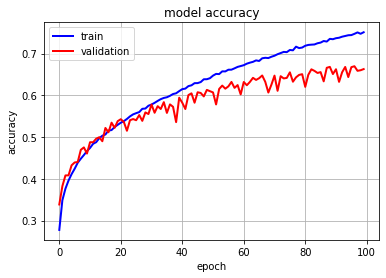

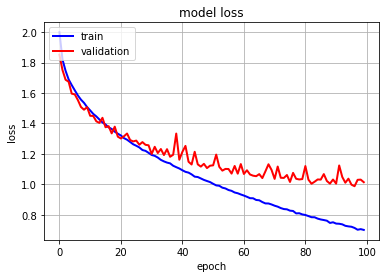

In [50]:
plothist(history)
plothist_loss(history)

### **Prediction**

In [51]:
predictions=(MLP_model.predict(MLP_x_test)).tolist()

MLP_y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])

MLP_y_predicted=Hot_to_num(MLP_y_pred_1hot)

### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

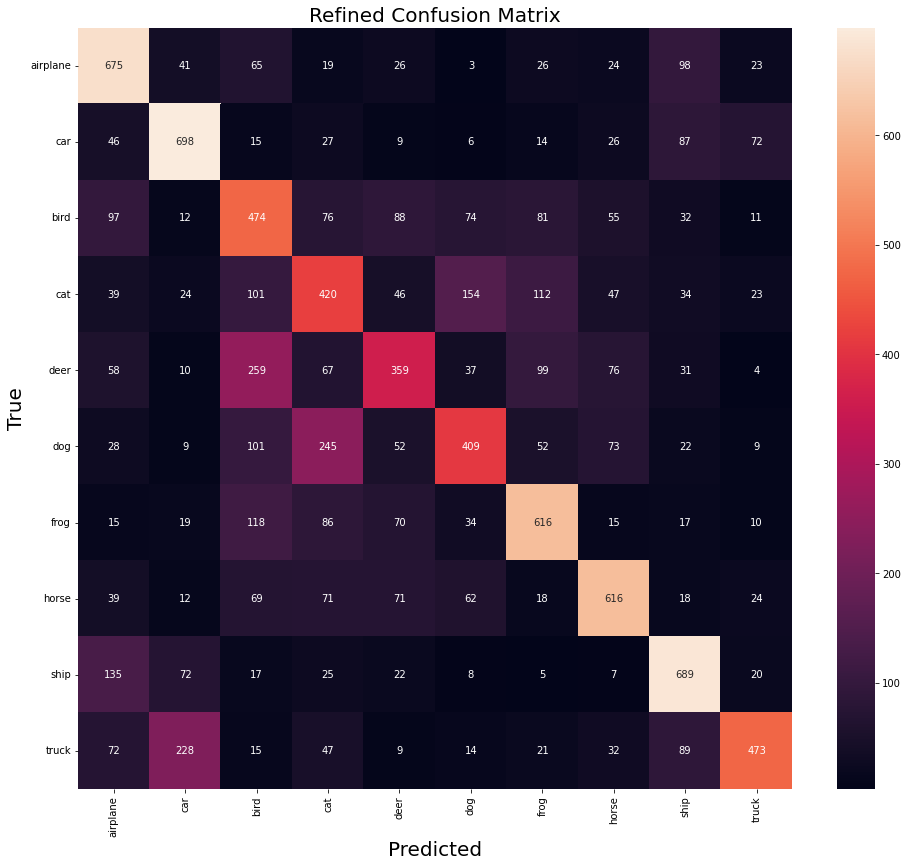

In [52]:
cm=confusion_matrix(MLP_y_test, MLP_y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [53]:
print(classification_report(MLP_y_test, MLP_y_predicted))

              precision    recall  f1-score   support

           0       0.56      0.68      0.61      1000
           1       0.62      0.70      0.66      1000
           2       0.38      0.47      0.42      1000
           3       0.39      0.42      0.40      1000
           4       0.48      0.36      0.41      1000
           5       0.51      0.41      0.45      1000
           6       0.59      0.62      0.60      1000
           7       0.63      0.62      0.63      1000
           8       0.62      0.69      0.65      1000
           9       0.71      0.47      0.57      1000

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.54     10000
weighted avg       0.55      0.54      0.54     10000



## **11.MLP// Imbalanced Dataset, SMOTE**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Number of Neurons in input layer: 512
* 	Number of Neurons in hidden layers:256
* 	Number of Neurons in output layer:10
* 	Hidden Layer Activation Function: Relu
* 	Output Layer Activation Function: Softmax
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: SGD
* 	Dropout: 0.2












### **Architecture**

In [58]:
MLP_num_epoch = 100
MLP_batch_size = 64
MLP_num_classes = 10
(x_train, y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

# Removing half of data in airplan and bird classes
labels=['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
removed_sample_air=[]
removed_sample_bird=[]
for sample in range(0,len(y_train)):
  if y_train[sample][0]==0:# airplain
    removed_sample_air.append(sample)
  if y_train[sample][0]==2:# bird
    removed_sample_bird.append(sample)

Index_Removed_List_air =np.random.uniform(0,len(removed_sample_air),int(len(removed_sample_air)*0.5)).astype(int)
Index_Removed_List_bird=np.random.uniform(0,len(removed_sample_bird),int(len(removed_sample_bird)*0.5)).astype(int)

r_air=[]
r_bird =[]
for i in Index_Removed_List_air:
  r_air.append(removed_sample_air[i])
for i in Index_Removed_List_bird:
  r_bird.append(removed_sample_bird[i])

r= r_air+r_bird

x_train_new=np.delete(x_train,(r),axis=0)
y_train_new=np.delete(y_train,(r),axis=0)




#preparing data 

x_train_new = x_train_new.reshape(len(x_train_new), 32 * 32 * 3)
MLP_x_test  = MLP_x_test.reshape (10000, 32 * 32 * 3)

# SMOTE
sm=SMOTE(random_state=42)
x_train_sm,y_train_sm=sm.fit_resample(x_train_new,y_train_new)

MLP_x_train, MLP_x_valid, MLP_y_train, MLP_y_valid = train_test_split(x_train_sm, y_train_sm, test_size=0.2, random_state=42)



MLP_x_train = MLP_x_train.astype('float32')
MLP_x_valid = MLP_x_valid.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')

# Normalise data
MLP_x_train /= 255.0
MLP_x_valid /= 255.0
MLP_x_test /= 255.0

# one-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes)
MLP_y_valid_1hot = np_utils.to_categorical(MLP_y_valid, MLP_num_classes) 
MLP_y_test_1hot  = np_utils.to_categorical(MLP_y_test , MLP_num_classes)

# MLP
MLP_model = Sequential()
# Input layer
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# First Hidden Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Second Hidde Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))

# Output Layer
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(10)) # use 10 neurons as the output 
MLP_model.add(Activation('softmax'))

MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

MLP_model.compile(loss='categorical_crossentropy', 
                  optimizer=MLP_opt_sgd,
                  metrics=['accuracy']) 
MLP_model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_33 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_34 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)              

### **Train the Model**

In [59]:
# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
#                     validation_split = 0.2)
                    validation_data=(MLP_x_valid, MLP_y_valid_1hot))

# MLP_model.save('MLP_model_sample.h5') #saved 31/10 9pm

# Evaluation on the training
print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Training.....
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 107us/step - loss: 2.0846 - accuracy: 0.2366 - val_loss: 1.9027 - val_accuracy: 0.3296
Epoch 2/100
40000/40000 [==============================] - 4s 100us/step - loss: 1.9086 - accuracy: 0.3140 - val_loss: 1.8178 - val_accuracy: 0.3611
Epoch 3/100
40000/40000 [==============================] - 4s 100us/step - loss: 1.8337 - accuracy: 0.3456 - val_loss: 1.7547 - val_accuracy: 0.3810
Epoch 4/100
40000/40000 [==============================] - 4s 100us/step - loss: 1.7791 - accuracy: 0.3654 - val_loss: 1.7233 - val_accuracy: 0.3851
Epoch 5/100
40000/40000 [==============================] - 4s 101us/step - loss: 1.7362 - accuracy: 0.3832 - val_loss: 1.6674 - val_accuracy: 0.4104
Epoch 6/100
40000/40000 [==============================] - 4s 100us/step - loss: 1.7009 - accuracy: 0.3937 - val_loss: 1.6712 - val_accuracy: 0.4061
Epoch 7/100
40000/40000 [=================

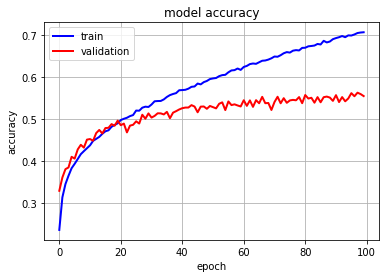

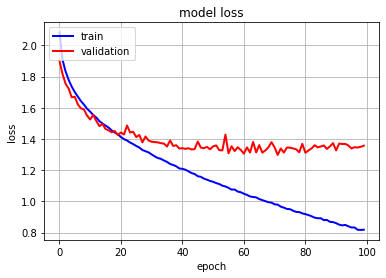

In [60]:
plothist(history)
plothist_loss(history)

### **Prediction**

In [61]:
predictions=(MLP_model.predict(MLP_x_test)).tolist()

MLP_y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])

MLP_y_predicted=Hot_to_num(MLP_y_pred_1hot)

### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

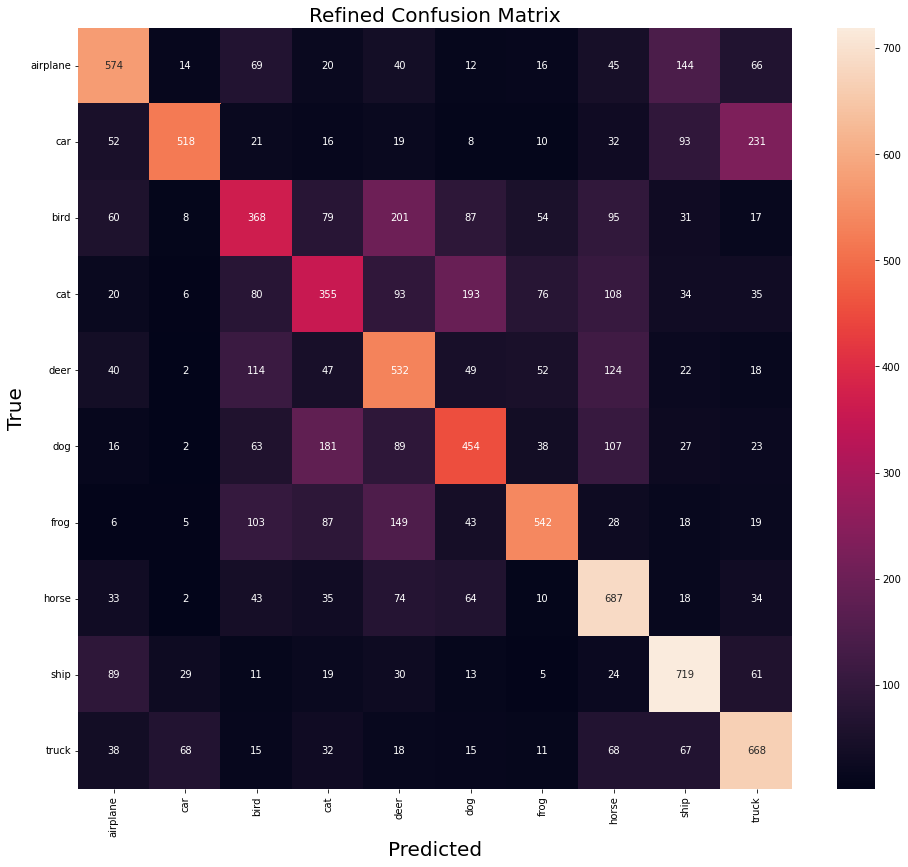

In [62]:
cm=confusion_matrix(MLP_y_test, MLP_y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [63]:
print(classification_report(MLP_y_test, MLP_y_predicted))

              precision    recall  f1-score   support

           0       0.62      0.57      0.60      1000
           1       0.79      0.52      0.63      1000
           2       0.41      0.37      0.39      1000
           3       0.41      0.35      0.38      1000
           4       0.43      0.53      0.47      1000
           5       0.48      0.45      0.47      1000
           6       0.67      0.54      0.60      1000
           7       0.52      0.69      0.59      1000
           8       0.61      0.72      0.66      1000
           9       0.57      0.67      0.62      1000

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.54     10000
weighted avg       0.55      0.54      0.54     10000



# **CNN**

## **1.CNN// Without Batch Normalization, Pooling, Dropout!**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Padding: Same
* 	Kernel: 3*3
* 	Convolution + ReLU
* 	Pooling:----
*   BatchNormalization:-----
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: SGD
* 	Dropout: ----












Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               14746112  
_________________________________________________________________
activation_7 (Activation)    (None, 512)              

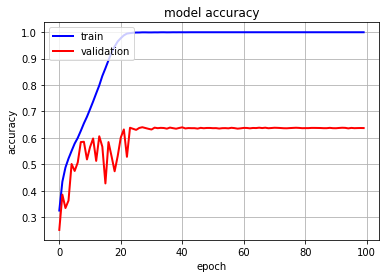

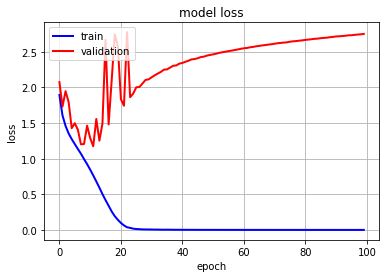

Test loss: 2.7652210041046144
Test acc: 0.6208000183105469


In [ ]:
# Retrieving Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Declare variables

nb_epoch = 100
batch_size = 64
nb_classes = 10

# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test  = np_utils.to_categorical(y_test , nb_classes)

x_train = x_train.astype('float32')
x_test  = x_test .astype('float32')

x_train  /= 255
x_test   /= 255

def base_model():

    model = Sequential()
    model.add( Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])  )
    model.add(Activation('relu'))
    
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512))
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    sgd = SGD()

# Train model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

cnn_n = base_model()
cnn_n.summary()

# Fit model

cnn = cnn_n.fit(x_train, y_train,
                batch_size=batch_size, 
                epochs=nb_epoch, 
                validation_split=0.1,
                shuffle=True)

plothist(cnn)
plothist_loss(cnn)

loss, acc = cnn_n.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

In [ ]:
predictions=(cnn_n.predict(x_test)).tolist()

y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])
y_predicted=Hot_to_num(y_pred_1hot)
y_test=Hot_to_num(y_test)


### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

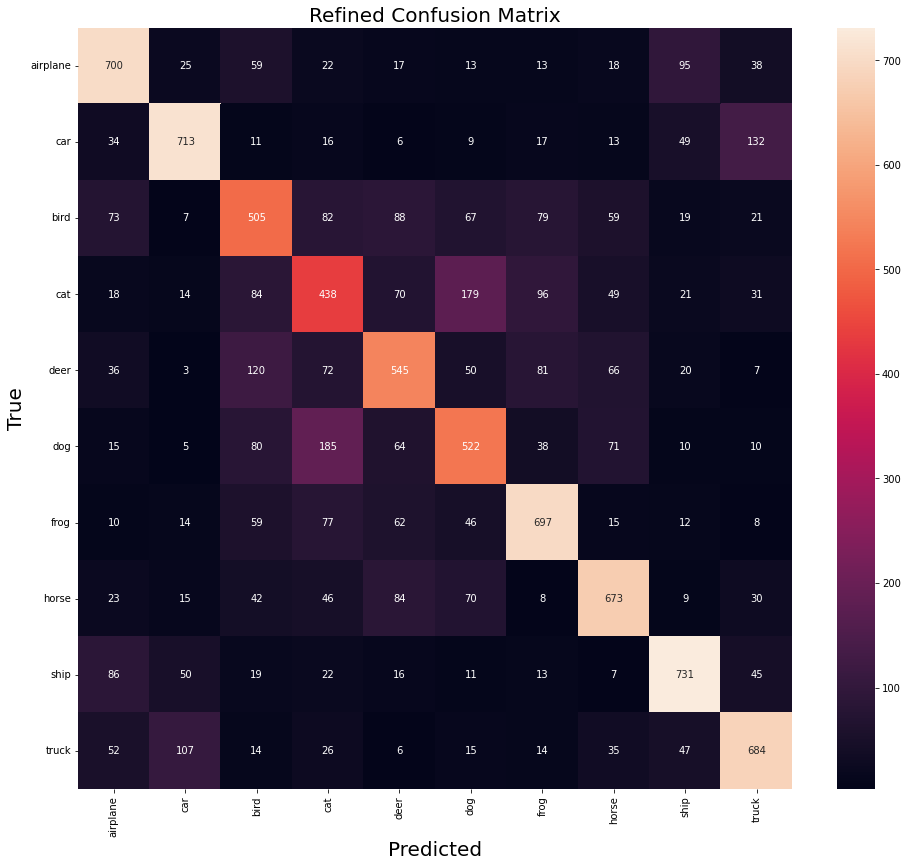

In [ ]:
cm=confusion_matrix(y_test, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1000
           1       0.75      0.71      0.73      1000
           2       0.51      0.51      0.51      1000
           3       0.44      0.44      0.44      1000
           4       0.57      0.55      0.56      1000
           5       0.53      0.52      0.53      1000
           6       0.66      0.70      0.68      1000
           7       0.67      0.67      0.67      1000
           8       0.72      0.73      0.73      1000
           9       0.68      0.68      0.68      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000



## **2.CNN// With Batch Normalization, Pooling and without Dropout!**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Padding: Same
* 	Kernel: 3*3
* 	Convolution + ReLU
* 	Pooling:Maxpooling,Pool size=2*2 
*   BatchNormalization:Before Activation Function
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: SGD
* 	Dropout: ----













Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)      

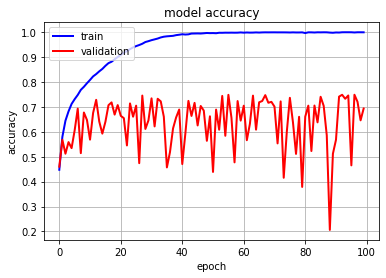

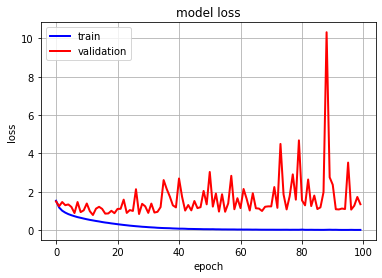

Evaluation with Test Set:
Test loss: 1.3735739503860473
Test acc: 0.6963000297546387


In [ ]:
# Retrieving Data
(CNN_x_train, CNN_y_train), (CNN_x_test, CNN_y_test) = cifar10.load_data()

# Declare variables

CNN_nb_epoch = 100
CNN_batch_size = 64
nb_classes = 10

# Convert and pre-processing

CNN_y_train = np_utils.to_categorical(CNN_y_train, nb_classes)
CNN_y_test = np_utils.to_categorical(CNN_y_test, nb_classes)

CNN_x_train = CNN_x_train.astype('float32')
CNN_x_test = CNN_x_test.astype('float32')

CNN_x_train  /= 255
CNN_x_test /= 255

def base_model():

    CNN_model = Sequential()
    CNN_model.add(Conv2D(32, (3, 3), padding='same', input_shape=CNN_x_train.shape[1:]))
    CNN_model.add(Activation('relu'))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    #CNN_model.add(Dropout(0.25))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    #CNN_model.add(Dropout(0.25))

    CNN_model.add(Flatten())
    
    CNN_model.add(Dense(512))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    #CNN_model.add(Dropout(0.5))
    
    CNN_model.add(Dense(nb_classes))
    CNN_model.add(Activation('softmax'))

    CNN_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    CNN_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    
    CNN_model.compile(loss='categorical_crossentropy', 
                      optimizer=CNN_opt_sgd,
                      metrics=['accuracy'])
    return CNN_model

cnn_n = base_model()
cnn_n.summary()

# Fit model
print('Training.....')
CNN_history = cnn_n.fit(CNN_x_train, CNN_y_train,
                batch_size=CNN_batch_size, 
                epochs=CNN_nb_epoch, 
                validation_split = 0.1, # validation_data=(CNN_x_test,CNN_y_test),
                shuffle=True)

print('Training Outcome:')
plothist(CNN_history)
plothist_loss(CNN_history)

print('Evaluation with Test Set:')
loss, acc = cnn_n.evaluate(CNN_x_test, CNN_y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

In [ ]:
predictions=(cnn_n.predict(x_test)).tolist()

y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])
y_predicted=Hot_to_num(y_pred_1hot)
y_test=Hot_to_num(CNN_y_test)


### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

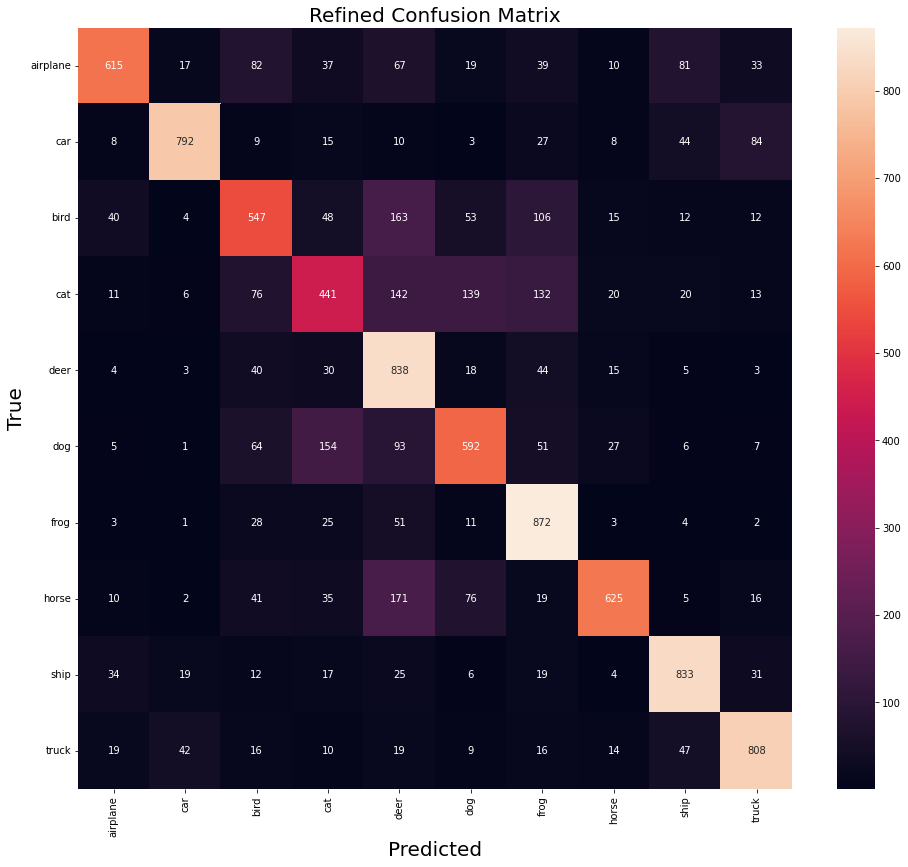

In [ ]:
cm=confusion_matrix(y_test, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70      1000
           1       0.89      0.79      0.84      1000
           2       0.60      0.55      0.57      1000
           3       0.54      0.44      0.49      1000
           4       0.53      0.84      0.65      1000
           5       0.64      0.59      0.61      1000
           6       0.66      0.87      0.75      1000
           7       0.84      0.62      0.72      1000
           8       0.79      0.83      0.81      1000
           9       0.80      0.81      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000



## **3.CNN// With Batch Normalization, Pooling and Dropout**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Padding: Same
* 	Kernel: 3*3
* 	Convolution + ReLU
* 	Pooling:Maxpooling,Pool size=2*2 
*   BatchNormalization:Before Activation Function
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: SGD
* 	Dropout: 0.25,0.25,0.5












Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_16 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)       

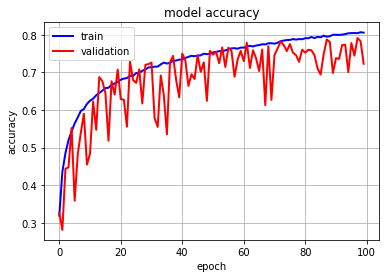

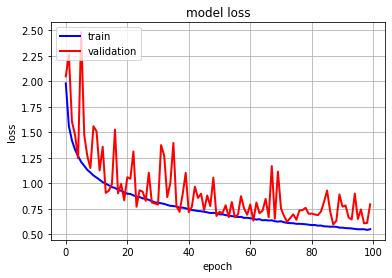

Evaluation with Test Set:
Test loss: 0.8107872887611389
Test acc: 0.717199981212616


In [ ]:
# Retrieving Data
(CNN_x_train, CNN_y_train), (CNN_x_test, CNN_y_test) = cifar10.load_data()

# Declare variables

CNN_nb_epoch = 100
CNN_batch_size = 64
nb_classes = 10

# Convert and pre-processing

CNN_y_train = np_utils.to_categorical(CNN_y_train, nb_classes)
CNN_y_test = np_utils.to_categorical(CNN_y_test, nb_classes)

CNN_x_train = CNN_x_train.astype('float32')
CNN_x_test = CNN_x_test.astype('float32')

CNN_x_train  /= 255
CNN_x_test /= 255

def base_model():

    CNN_model = Sequential()
    CNN_model.add(Conv2D(32, (3, 3), padding='same', input_shape=CNN_x_train.shape[1:]))
    CNN_model.add(Activation('relu'))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))

    CNN_model.add(Flatten())
    
    CNN_model.add(Dense(512))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(Dropout(0.5))
    
    CNN_model.add(Dense(nb_classes))
    CNN_model.add(Activation('softmax'))

    CNN_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    CNN_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    
    CNN_model.compile(loss='categorical_crossentropy', 
                      optimizer=CNN_opt_sgd,
                      metrics=['accuracy'])
    return CNN_model

cnn_n = base_model()
cnn_n.summary()

# Fit model
print('Training.....')
CNN_history = cnn_n.fit(CNN_x_train, CNN_y_train,
                batch_size=CNN_batch_size, 
                epochs=CNN_nb_epoch, 
                validation_split = 0.1, # validation_data=(CNN_x_test,CNN_y_test),
                shuffle=True)

print('Training Outcome:')
plothist(CNN_history)
plothist_loss(CNN_history)

print('Evaluation with Test Set:')
loss, acc = cnn_n.evaluate(CNN_x_test, CNN_y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

In [ ]:
predictions=(cnn_n.predict(x_test)).tolist()

y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])
y_predicted=Hot_to_num(y_pred_1hot)
y_test=Hot_to_num(CNN_y_test)


### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

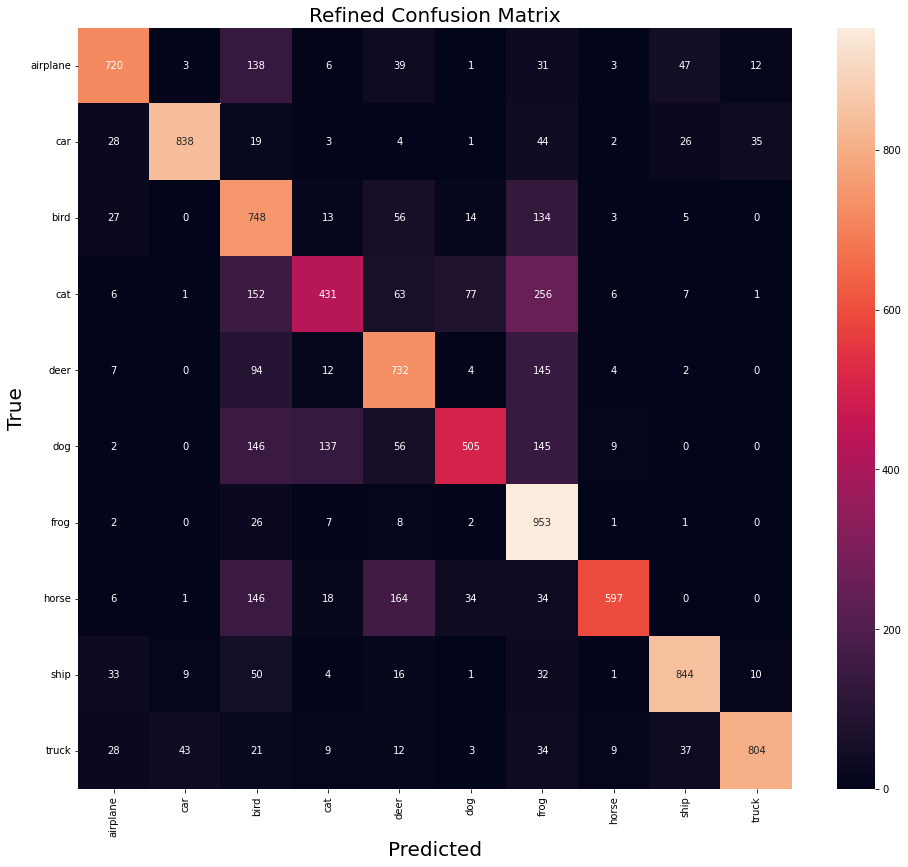

In [ ]:
cm=confusion_matrix(y_test, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77      1000
           1       0.94      0.84      0.88      1000
           2       0.49      0.75      0.59      1000
           3       0.67      0.43      0.53      1000
           4       0.64      0.73      0.68      1000
           5       0.79      0.51      0.62      1000
           6       0.53      0.95      0.68      1000
           7       0.94      0.60      0.73      1000
           8       0.87      0.84      0.86      1000
           9       0.93      0.80      0.86      1000

    accuracy                           0.72     10000
   macro avg       0.76      0.72      0.72     10000
weighted avg       0.76      0.72      0.72     10000



## **4.CNN// With ADAM Optimizer**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Padding: Same
* 	Kernel: 3*3
* 	Convolution + ReLU
* 	Pooling:Maxpooling,Pool size=2*2 
*   BatchNormalization:Before Activation Function
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: ADAM
* 	Dropout: 0.25,0.25,0.5












Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 32)       

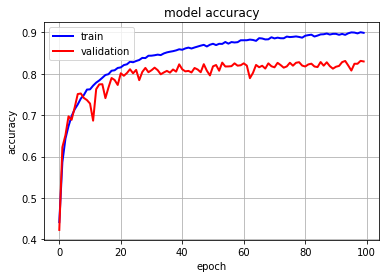

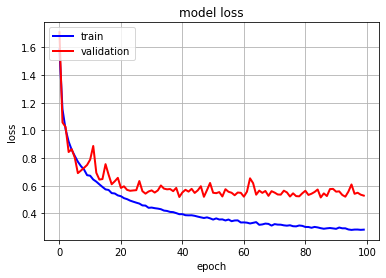

Evaluation with Test Set:
Test loss: 0.5746296861171722
Test acc: 0.8162999749183655


In [ ]:
# Retrieving Data
(CNN_x_train, CNN_y_train), (CNN_x_test, CNN_y_test) = cifar10.load_data()

# Declare variables

CNN_nb_epoch = 100
CNN_batch_size = 64
nb_classes = 10

# Convert and pre-processing

CNN_y_train = np_utils.to_categorical(CNN_y_train, nb_classes)
CNN_y_test = np_utils.to_categorical(CNN_y_test, nb_classes)

CNN_x_train = CNN_x_train.astype('float32')
CNN_x_test = CNN_x_test.astype('float32')

CNN_x_train  /= 255
CNN_x_test /= 255

def base_model():

    CNN_model = Sequential()
    CNN_model.add(Conv2D(32, (3, 3), padding='same', input_shape=CNN_x_train.shape[1:]))
    CNN_model.add(Activation('relu'))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))

    CNN_model.add(Flatten())
    
    CNN_model.add(Dense(512))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(Dropout(0.5))
    
    CNN_model.add(Dense(nb_classes))
    CNN_model.add(Activation('softmax'))

    CNN_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    CNN_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    
    CNN_model.compile(loss='categorical_crossentropy', 
                      optimizer='adam',
                      metrics=['accuracy'])
    return CNN_model

cnn_n = base_model()
cnn_n.summary()

# Fit model
print('Training.....')
CNN_history = cnn_n.fit(CNN_x_train, CNN_y_train,
                batch_size=CNN_batch_size, 
                epochs=CNN_nb_epoch, 
                validation_split = 0.1, # validation_data=(CNN_x_test,CNN_y_test),
                shuffle=True)

print('Training Outcome:')
plothist(CNN_history)
plothist_loss(CNN_history)

print('Evaluation with Test Set:')
loss, acc = cnn_n.evaluate(CNN_x_test, CNN_y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

In [ ]:
predictions=(cnn_n.predict(CNN_x_test)).tolist()

y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])
y_predicted=Hot_to_num(y_pred_1hot)
y_test=Hot_to_num(CNN_y_test)


### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

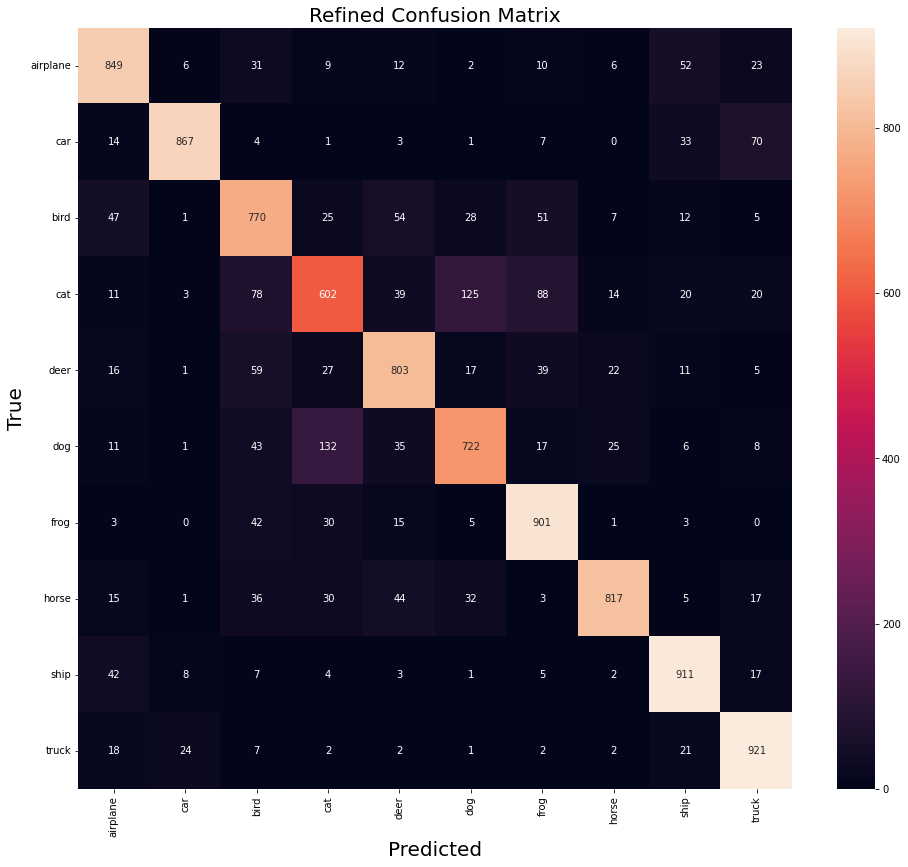

In [ ]:
cm=confusion_matrix(y_test, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.95      0.87      0.91      1000
           2       0.71      0.77      0.74      1000
           3       0.70      0.60      0.65      1000
           4       0.80      0.80      0.80      1000
           5       0.77      0.72      0.75      1000
           6       0.80      0.90      0.85      1000
           7       0.91      0.82      0.86      1000
           8       0.85      0.91      0.88      1000
           9       0.85      0.92      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



## **5.CNN//Improved version with data augmentation**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Padding: Same
* 	Kernel: 3*3
* 	Convolution + ReLU
* 	Pooling:Maxpooling,Pool size=2*2 
*   BatchNormalization:Before Activation Function
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: ADAM
* 	Dropout: 0.25,0.25,0.5












Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_26 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_18 (Batc (None, 28, 28, 32)       

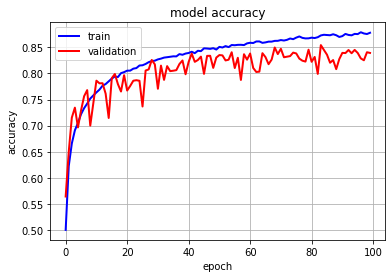

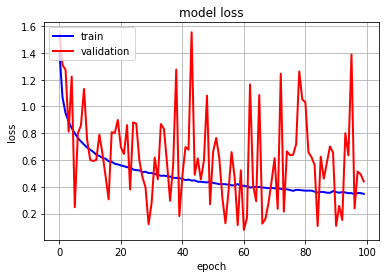

Evaluation with Test Set:
Test loss: 0.5887438404560089
Test acc: 0.8246999979019165


In [ ]:
# Retrieving Data
(CNN_x_train, CNN_y_train), (CNN_x_test, CNN_y_test) = cifar10.load_data()

# Declare variables

CNN_nb_epoch = 100
CNN_batch_size = 64
nb_classes = 10

train_datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        rotation_range = 10,
        horizontal_flip=True)   # flip images horizontally

validation_datagen = ImageDataGenerator()

# Convert and pre-processing

CNN_y_train = np_utils.to_categorical(CNN_y_train, nb_classes)
CNN_y_test = np_utils.to_categorical(CNN_y_test, nb_classes)

CNN_x_train = CNN_x_train.astype('float32')
CNN_x_test = CNN_x_test.astype('float32')

CNN_x_train  /= 255
CNN_x_test /= 255

train_generator = train_datagen.flow(CNN_x_train[:40000], CNN_y_train[:40000], batch_size=32)
validation_generator = validation_datagen.flow(CNN_x_train[40000:], CNN_y_train[40000:], batch_size=32)

def base_model():

    CNN_model = Sequential()
    CNN_model.add(Conv2D(32, (3, 3), padding='same', input_shape=CNN_x_train.shape[1:]))
    CNN_model.add(Activation('relu'))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
#     CNN_model.add(Dropout(0.25))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
#     CNN_model.add(Dropout(0.25))

    CNN_model.add(Flatten())
    
    CNN_model.add(Dense(512))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(Dropout(0.2))
    
    CNN_model.add(Dense(nb_classes))
    CNN_model.add(Activation('softmax'))

    CNN_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    CNN_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
    CNN_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
   
    
    CNN_model.compile(loss='categorical_crossentropy', 
                      optimizer='adam',
                      metrics=['accuracy'])
    return CNN_model

cnn_n = base_model()
cnn_n.summary()

# Fit model
print('Training.....')
# CNN_history = cnn_n.fit(CNN_x_train, CNN_y_train,
#                 batch_size=CNN_batch_size, 
#                 epochs=CNN_nb_epoch, 
#                 validation_split = 0.2, # validation_data=(CNN_x_test,CNN_y_test),
#                 shuffle=True)

CNN_history = cnn_n.fit_generator(train_generator,
                                  validation_data=validation_generator,
                                  validation_steps=len(CNN_x_train[40000:]) / 32,
                                  steps_per_epoch=len(CNN_x_train[:40000]) / 32,
                                  epochs=CNN_nb_epoch,
                                  shuffle=True)
#                                   verbose=2)

print('Training Outcome:')
plothist(CNN_history)
plothist_loss(CNN_history)

print('Evaluation with Test Set:')
loss, acc = cnn_n.evaluate(CNN_x_test, CNN_y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

In [ ]:
predictions=(cnn_n.predict(CNN_x_test)).tolist()

y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])
y_predicted=Hot_to_num(y_pred_1hot)
y_test=Hot_to_num(CNN_y_test)


### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

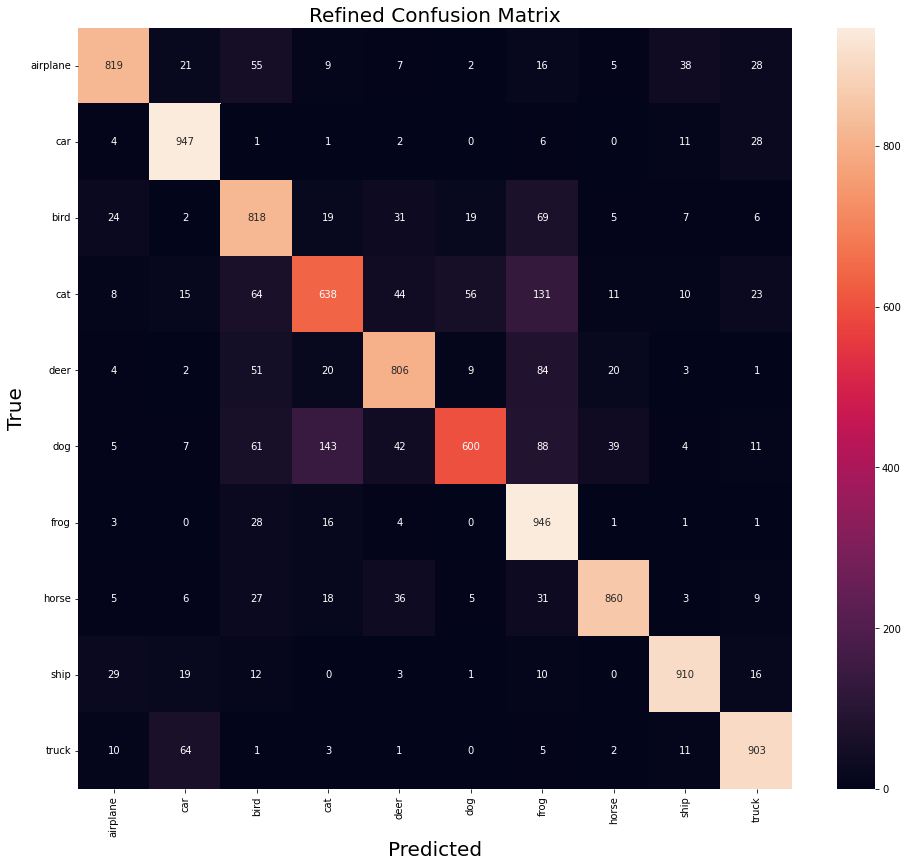

In [ ]:
cm=confusion_matrix(y_test, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1000
           1       0.87      0.95      0.91      1000
           2       0.73      0.82      0.77      1000
           3       0.74      0.64      0.68      1000
           4       0.83      0.81      0.82      1000
           5       0.87      0.60      0.71      1000
           6       0.68      0.95      0.79      1000
           7       0.91      0.86      0.89      1000
           8       0.91      0.91      0.91      1000
           9       0.88      0.90      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

